In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **ORIGINAL**

## **Content Draw_accuracy_vs_accuracy**
1. In the OS-CNN Vs. InceptionTime figure, the two outliers are PLAID and InsectEPGSmallTrain datasets.  
2. The hyper-parameter setting causes significantly lower results for we use a fixed  hyper-parameter for all datasets.  
3. It can be solved by using other hyper-parameters.  
  
- ใน OS-CNN Vs. ตัวเลข InceptionTime ค่า outlier ทั้งสองคือชุดข้อมูล PLAID และ InsectEPGSmallTrain  
  
- การตั้งค่าพารามิเตอร์ไฮเปอร์ทำให้ผลลัพธ์ที่ต่ำกว่าอย่างเห็นได้ชัดสำหรับเราใช้ไฮเปอร์พารามิเตอร์คงที่สำหรับชุดข้อมูลทั้งหมด  
  
- สามารถแก้ไขได้โดยใช้ไฮเปอร์พารามิเตอร์อื่นๆ  

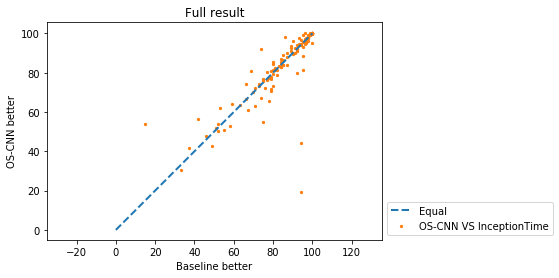

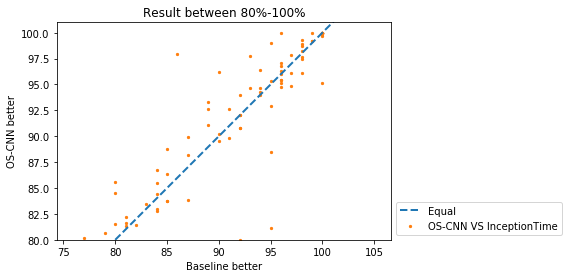

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

def Dwaw_acc_Vs_acc(model_acc, Baseline_acc, model_name,Baseline_name):
    fig = plt.figure()
    plt.xlabel('Baseline better')
    plt.ylabel(model_name+' better')
    plt.plot([0,100], [0,100], '--', linewidth=2, markersize=0, label ='Equal',c ='C0')
    plt.axis('equal')
    plt.scatter(Baseline_acc*100,model_acc*100,label = model_name+' VS '+Baseline_name, s =5, c ='C1')
    plt.legend(loc='lower left', bbox_to_anchor=(1, 0))
    plt.title("Full result")
    
    fig = plt.figure()
    plt.xlabel('Baseline better')
    plt.ylabel(model_name+' better')
    plt.plot([80,105], [80,105], '--', linewidth=2, markersize=0, label ='Equal',c ='C0')
    plt.axis('equal')
    plt.scatter(Baseline_acc*100,model_acc*100,label = model_name+' VS '+Baseline_name, s =5, c ='C1')
    plt.legend(loc='lower left', bbox_to_anchor=(1, 0))
    plt.axis([80,101,80,101])
    plt.title("Result between 80%-100%")
    plt.show()

result_path = './InceptionTime_VS_OS-CNN.csv'
file = pd.read_csv(result_path)
InceptionTime_Acc = file['InceptionTime'].to_numpy()
OS_Acc = file['OS-CNN'].to_numpy()
Dwaw_acc_Vs_acc(OS_Acc,InceptionTime_Acc,'OS-CNN','InceptionTime')

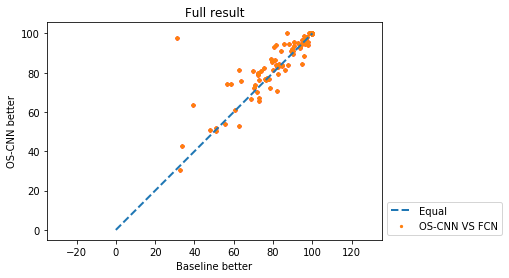

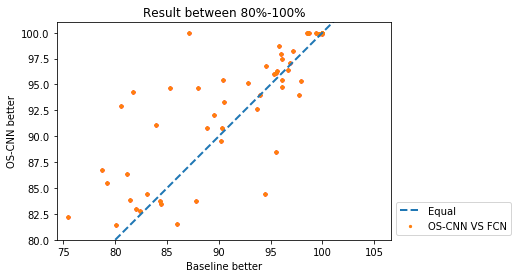

In [ ]:
def clean_string(pandas_list):
    Result_list =[]
    for i in pandas_list:
        Result_list.append(float(i.split('(')[0]))
    return Result_list

result_path = './Full_result_on_85_datasets.csv'
file = pd.read_csv(result_path)
FCN_Acc = clean_string(file['FCN'].to_numpy())
OS_Acc = clean_string(file['OS-CNN'].to_numpy())
Dwaw_acc_Vs_acc(OS_Acc,FCN_Acc,'OS-CNN','FCN')

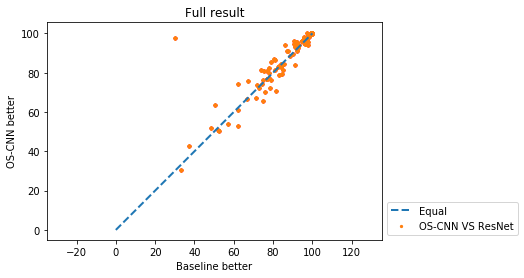

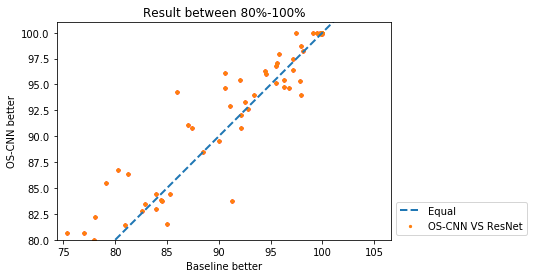

In [ ]:
result_path = './Full_result_on_85_datasets.csv'
file = pd.read_csv(result_path)
ResNet_Acc = clean_string(file['ResNet'].to_numpy())
OS_Acc = clean_string(file['OS-CNN'].to_numpy())
Dwaw_acc_Vs_acc(OS_Acc,ResNet_Acc,'OS-CNN','ResNet')

**

## **Content 3_1_compare_result**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from scipy.stats import rankdata

def string2pair(information):
    if type(information) == np.float64:
        mean = information
        std = 0
    else:
        information = information.strip()
        information = information.strip(')')
        result = information.split('(')
        mean = float(result[0])
        std = float(result[1])
    return (mean,std)


# deep learning classifier:
#'MLP','FCN','ResNet','Encoder','MCNN','t-LeNet','MCDCNN','Time-CNN','TWIESN','InceptionTime','OS-CNN'
#'OS-CNN-ENS(2)','OS-CNN-ENS(3)','OS-CNN-ENS(4)',...,'OS-CNN-ENS(10)',

# traditional classifier:
#'1-NN DTW','1-NN DTW CV','TSBF','LS','EE(PROP)','BOSS','ST','WEASEL','HIVE-COTE','COTE','PF'


# full
get_result_list = ['Encoder','FCN','ResNet','MLP','MCNN','t-LeNet','MCDCNN',
                    'Time-CNN','TWIESN','1-NN DTW CV','1-NN DTW',
                    'LS','TSBF','EE(PROP)','PF','ST','BOSS','WEASEL','Flat-COTE','HIVE-COTE','InceptionTime','Inception',
                   'OS-CNN','OS-CNN-ENS(5)','OS-CNN-ENS(8)']

get_result_list = ['FCN','ResNet','1-NN DTW CV','1-NN DTW','BOSS',
                   'WEASEL','Flat-COTE','HIVE-COTE','InceptionTime','Inception',
                   'OS-CNN','OS-CNN-ENS(5)','OS-CNN-ENS(8)']

# ablation study of general solution
# get_result_list = ['FCN(16)','FCN(50)','FCN(100)','FCN(150)','FCN(200)','OS-CNN']

#SOTA
#get_result_list = ['ST','ResNet','WEASEL','HIVE-COTE','InceptionTime','OS-CNN-ENS(8)']

#ablation
#get_result_list = ['ST','ResNet','WEASEL','InceptionTime','OS-CNN-ENS(5)']

#non ensemble SOTA baseline
#get_result_list = ['ResNet','WEASEL','OS-CNN'] 

#get_result_list = ['OS-CNN','OS-CNN-ENS(2)','OS-CNN-ENS(3)','OS-CNN-ENS(4)','OS-CNN-ENS(5)','OS-CNN-ENS(6)','OS-CNN-ENS(7)','OS-CNN-ENS(8)']

#get_result_list =['ST','ResNet','WEASEL','HIVE-COTE','InceptionTime','OS-CNN-ENS(5)']

print(get_result_list)

['FCN', 'ResNet', '1-NN DTW CV', '1-NN DTW', 'BOSS', 'WEASEL', 'Flat-COTE', 'HIVE-COTE', 'InceptionTime', 'Inception', 'OS-CNN', 'OS-CNN-ENS(5)', 'OS-CNN-ENS(8)']


In [ ]:
result_path = './Full_result.csv'


file = pd.read_csv(result_path)
result_block = np.zeros([file.shape[0],len(get_result_list)])
for i in range(file.shape[0]):
    data_name = file['dataset_name'][i]
    for j, keras_Baseline in enumerate (get_result_list):
        temp = string2pair(file[keras_Baseline][i])
        result_block[i,j] = temp[0]
print('average accuracy', np.mean(result_block,axis=0))

average accuracy [80.76864114 82.20125791 76.00352941 73.77882353 81.01932183 83.34235294
 83.81253894 84.7139969  84.52887304 83.93688758 83.70924843 84.61372253
 84.77430952]


In [ ]:


def get_maxest_index(result_block):
    index = np.argsort(result_block,axis = 1)
    temp = np.zeros(result_block.shape)
    for i in range(result_block.shape[0]):
        l=result_block[i,:]
        temp[i,:] = rankdata(l,method='min')
        temp[i,:] = rankdata(l)
    return temp



def get_average_rank_and_wins(result_block):
    max_index_result = get_maxest_index(-result_block)
    average_rank =  np.around( np.average(max_index_result,axis=0), decimals=6)
    

    wins = np.count_nonzero(max_index_result==1, axis = 0)

    return average_rank, wins

average_rank, wins= get_average_rank_and_wins(result_block)

print('average rank',average_rank)
print('wins', wins)


average rank [ 8.064706  7.152941 10.829412 11.305882  8.270588  6.647059  6.382353
  5.005882  4.817647  6.341176  6.835294  4.976471  4.370588]
wins [ 4  4  1  1  3  8  4 13 13  0  1  1 15]


In [ ]:
import pandas as pd
def blod_min(array):
    blod_val = min(array)
    output_result = []
    for i in array:
        if i == blod_val:
            element_str = 'blodstart '+str(i)+' blodend'
        else:
            element_str = str(i)
        output_result.append(element_str)    
    return output_result

def blod_max(array):
    blod_val = max(array)
    output_result = []
    for i in array:
        if i == blod_val:
            element_str = 'blodstart '+str(i)+' blodend'
        else:
            element_str = str(i)
        output_result.append(element_str)    
    return output_result


df = pd.DataFrame({'Classifier': get_result_list})
df = df.T

df.loc['Average rank'] = average_rank
df.loc['Counts of wins'] = wins
print(df.index[df.index=='Average rank'])
print(df,end='\n\n')



df = pd.DataFrame({'Classifier': get_result_list})
df = df.T

average_accuracy_dp = np.round(np.mean(result_block,axis=0),2)

df.loc['Average rank'] = blod_min(average_rank)
df.loc['Counts of wins'] = blod_max(wins)
df.loc['Average accuracy(\%)'] = blod_max(average_accuracy_dp)

z = df.to_latex(header = None)
z = z.replace("blodstart ", "\\textbf{")
z = z.replace(" blodend ", "}")
z = z.replace("\\\\", " \\\\ \hline")
z = z.replace("\\toprule", "\hline")
z = z.replace("\\bottomrule", "")
z = z.replace("l"*(df.shape[1]+1), "|l"*(df.shape[1]+1)+"|")

print(z)


Index(['Average rank'], dtype='object')
                     0        1            2         3        4        5   \
Classifier          FCN   ResNet  1-NN DTW CV  1-NN DTW     BOSS   WEASEL   
Average rank    8.06471  7.15294      10.8294   11.3059  8.27059  6.64706   
Counts of wins        4        4            1         1        3        8   

                       6          7              8          9        10  \
Classifier      Flat-COTE  HIVE-COTE  InceptionTime  Inception   OS-CNN   
Average rank      6.38235    5.00588        4.81765    6.34118  6.83529   
Counts of wins          4         13             13          0        1   

                           11             12  
Classifier      OS-CNN-ENS(5)  OS-CNN-ENS(8)  
Average rank          4.97647        4.37059  
Counts of wins              1             15  

\begin{tabular}{|l|l|l|l|l|l|l|l|l|l|l|l|l|l|}
\hline
Classifier           &       FCN &    ResNet &  1-NN DTW CV &   1-NN DTW &      BOSS &    WEASEL &  Flat-CO

FCN WilcoxonResult(statistic=663.0, pvalue=4.431185258136164e-06)
ResNet WilcoxonResult(statistic=740.5, pvalue=6.758808008441763e-05)
1-NN DTW CV WilcoxonResult(statistic=185.5, pvalue=1.5351398243085069e-12)
1-NN DTW WilcoxonResult(statistic=88.0, pvalue=1.323491430326825e-13)
BOSS WilcoxonResult(statistic=593.5, pvalue=2.395895792997268e-06)
WEASEL WilcoxonResult(statistic=1096.0, pvalue=0.018012070180317006)
Flat-COTE WilcoxonResult(statistic=1094.0, pvalue=0.03853878692991238)
HIVE-COTE WilcoxonResult(statistic=1498.5, pvalue=0.834298164549151)
InceptionTime WilcoxonResult(statistic=1343.5, pvalue=0.6669244194632059)
Inception WilcoxonResult(statistic=963.5, pvalue=0.004054162859178928)
OS-CNN WilcoxonResult(statistic=83.0, pvalue=1.680343005230345e-13)
OS-CNN-ENS(5) WilcoxonResult(statistic=406.0, pvalue=4.669718760909213e-06)
                           0                     1     2
Classifier     Baseline wins    OS-CNN-ENS(8) wins  Same
FCN                       21  blodstart 5

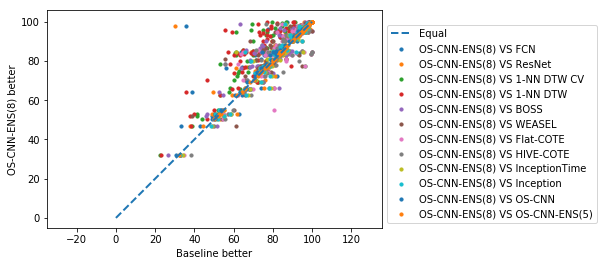

In [ ]:
df = pd.DataFrame({'Classifier': ['Baseline wins',get_result_list[-1]+' wins','Same']})
df = df.T

fig = plt.figure()
plt.xlabel('Baseline better')
plt.ylabel(get_result_list[-1]+' better')
plt.plot([0,100], [0,100], '--', linewidth=2, markersize=0, label ='Equal',c ='C0')
plt.axis('equal')
for i in range(len(get_result_list)-1):
    temp = result_block[:,[i,-1]]
    temp = np.around(result_block[:,[i,-1]], decimals=2)
    print(get_result_list[i],wilcoxon(temp[:,0],temp[:,1])) 
    max_index_temp = get_maxest_index(-temp)
    wins = np.count_nonzero(max_index_temp<2, axis = 0)
    count_same = (wins[0]+wins[1]-85)
    loss_win_tie = [wins[0]-count_same,wins[1]-count_same,count_same]
    df.loc[get_result_list[i]] = blod_max(loss_win_tie)
    plt.scatter(temp[:,0],temp[:,1],label = get_result_list[-1]+' VS '+get_result_list[i], s =10)
    plt.legend(loc='lower left', bbox_to_anchor=(1, 0))
print(df)
z = df.to_latex(header = None)
z = z.replace("blodstart ", "\\textbf{")
z = z.replace(" blodend ", "}")
z = z.replace("\\\\", " \\\\ \hline")
z = z.replace("\\toprule", "\hline")
z = z.replace("\\bottomrule", "")
z = z.replace("l"*(df.shape[1]+1), "|l"*(df.shape[1]+1)+"|")
print(z)

fig.savefig("./result_compare.pdf", bbox_inches='tight')

In [ ]:
df = pd.DataFrame(['classifier_name','dataset_name','accuracy'])
df = df.T
dataset_name_list = file['dataset_name']
#print(dataset_name_list)
for j,classifier_name in enumerate(get_result_list):
    for i,dataset_name in enumerate(dataset_name_list):
        #print(classifier_name,i,result_block[i,j])
        #print(classifier_name,i,result_block[i,j])
        df = df.append([[classifier_name,i,result_block[i,j]]]) 
example_path = './CD_diagram/example.csv'
df.to_csv(example_path,index=False,header =False )

In [ ]:
Image_Outline =['Adiac',
'ArrowHead',
'BeetleFly',
'BirdChicken',
'Car',
'DiatomSizeReduction',
'DistalPhalanxOutlineAgeGroup',
'DistalPhalanxOutlineCorrect',
'DistalPhalanxTW',
'FaceAll',
'FaceFour',
'FacesUCR',
'FiftyWords',
'Fish',
'HandOutlines',
'Herring',
'MedicalImages',
'MiddlePhalanxOutlineAgeGroup',
'MiddlePhalanxOutlineCorrect',
'MiddlePhalanxTW',
'OSULeaf',
'PhalangesOutlinesCorrect',
'Plane',
'ProximalPhalanxOutlineAgeGroup',
'ProximalPhalanxOutlineCorrect',
'ProximalPhalanxTW',
'ShapesAll',
'SwedishLeaf',
'Symbols',
'WordSynonyms',
'Worms',
'WormsTwoClass',
'Yoga'
 ]

Motion_Sensors = ['CricketX',
'CricketY',
'CricketZ',
'GunPoint',
'Haptics',
'InlineSkate',
'ToeSegmentation1',
'ToeSegmentation2',
'UWaveGestureLibraryAll',
'UWaveGestureLibraryX',
'UWaveGestureLibraryY',
'UWaveGestureLibraryZ']

Sensor_Readings=['Beef',
'ChlorineConcentration',
'CinCECGTorso',
'Coffee',
'Computers',
'Earthquakes',
'ECG200',
'ECG5000',
'ECGFiveDays',
'ElectricDevices',
'FordA',
'FordB',
'Ham',
'InsectWingbeatSound',
'ItalyPowerDemand',
'LargeKitchenAppliances',
'Lightning2',
'Lightning7',
'Meat',
'MoteStrain',
'NonInvasiveFetalECGThorax1',
'NonInvasiveFetalECGThorax2',
'OliveOil',
'Phoneme',
'RefrigerationDevices',
'ScreenType',
'SmallKitchenAppliances',
'SonyAIBORobotSurface1',
'SonyAIBORobotSurface2',
'StarLightCurves',
'Strawberry',
'Trace',
'TwoPatterns',
'Wafer',
'Wine']

Synthetic=['CBF',
         'Mallat',
          'ShapeletSim',
          'SyntheticControl',
          'TwoLeadECG'
          ]











In [ ]:
result_path = './Full_result.csv'

file = pd.read_csv(result_path)
dataset_type_list= [Image_Outline, Motion_Sensors, Sensor_Readings,Synthetic]
dataset_type_name_list= ['Image_Outline', 'Motion_Sensors', 'Sensor_Readings','Synthetic']



df = pd.DataFrame({'Classifier': get_result_list})
df = df.T


for dataset_type_index,dataset_type in enumerate(dataset_type_list):
    data_name_list = dataset_type
    result_block = np.zeros([len(data_name_list),len(get_result_list)])
    for i,data_name in enumerate(data_name_list):
        dfb = file[file['dataset_name']==data_name].index.values.astype(int)
        for j, keras_Baseline in enumerate (get_result_list):
            temp = file.iloc[dfb][keras_Baseline]
            temp = string2pair(temp.values[0])
            result_block[i,j] = temp[0]
    average_rank, wins= get_average_rank_and_wins(result_block)
    #temp = np.round(wins*100/np.sum(wins),2)
    #print(average_rank, wins)
    df.loc[dataset_type_name_list[dataset_type_index]+'('+str(len(dataset_type))+')'] = blod_min(average_rank)


z = df.to_latex(header = None)
z = z.replace("blodstart ", "\\textbf{")
z = z.replace(" blodend ", "}")
z = z.replace("\\\\", " \\\\ \hline")
z = z.replace("\\toprule", "\hline")
z = z.replace("\\bottomrule", "")
z = z.replace("l"*(df.shape[1]+1), "|l"*(df.shape[1]+1)+"|")
print(z)

\begin{tabular}{|l|l|l|l|l|l|l|l|l|l|l|l|l|l|}
\hline
Classifier          &       FCN &    ResNet &  1-NN DTW CV &   1-NN DTW &      BOSS &    WEASEL &  Flat-COTE &  HIVE-COTE &               InceptionTime &  Inception &    OS-CNN &  OS-CNN-ENS(5) &               OS-CNN-ENS(8)  \\ \hline
Image\_Outline(33)   &  7.939394 &  7.575758 &    11.227273 &  11.409091 &  7.681818 &  6.030303 &   7.075758 &   5.272727 &                    4.651515 &   6.606061 &  6.757576 &        4.69697 &  \textbf{4.075758} \\ \hline
Motion\_Sensors(12)  &  9.583333 &  9.333333 &    10.333333 &  11.666667 &  8.583333 &  7.916667 &   5.916667 &   3.916667 &                        4.25 &   5.583333 &      6.25 &       4.166667 &       \textbf{3.5} \\ \hline
Sensor\_Readings(35) &  7.614286 &  6.214286 &    10.628571 &  11.428571 &  8.614286 &  6.571429 &   5.771429 &   5.042857 &  \textbf{4.914286}&   6.142857 &  7.342857 &       5.657143 &                    5.057143  \\ \hline
Synthetic(5)        &       8.4 &

In [ ]:
Size_1_to_100 =[
'ItalyPowerDemand',
'SyntheticControl',
'SonyAIBORobotSurface2',
'SonyAIBORobotSurface1',
'DistalPhalanxOutlineAgeGroup',
'DistalPhalanxOutlineCorrect',
'DistalPhalanxTW',
'MiddlePhalanxOutlineAgeGroup',
'MiddlePhalanxOutlineCorrect',
'MiddlePhalanxTW',
'PhalangesOutlinesCorrect',
'ProximalPhalanxOutlineAgeGroup',
'ProximalPhalanxOutlineCorrect',
'ProximalPhalanxTW',
'TwoPatterns',
'MoteStrain',
'ECG200',
'ElectricDevices',
'MedicalImages',
]

Size_101_to_200=[
'CBF',
'SwedishLeaf',
'TwoLeadECG',
'FaceAll',
'FacesUCR',
'ECGFiveDays',
'ECG5000',
'Plane',
'GunPoint',
'Wafer',
'ChlorineConcentration',
'Adiac',

]

Size_201_to_300 =[
'Wine',
'Strawberry',
'ArrowHead',
'InsectWingbeatSound',
'FiftyWords',
'WordSynonyms',
'Trace',
'ToeSegmentation1',
'Coffee',
'CricketX',
'CricketY',
'CricketZ',
]

Size_301_to_400 =[
'UWaveGestureLibraryAll',
'UWaveGestureLibraryX',
'UWaveGestureLibraryY',
'Lightning7',
'ToeSegmentation2',
'DiatomSizeReduction',
'FaceFour',
]

Size_401_to_500 =[
'Symbols',
'Yoga',
'OSULeaf',
'Ham',
'Meat',
'Fish',
'Beef',
'FordA',
'FordB',
'ShapeletSim',
]
Size_501_to_600 =[
    'BeetleFly',
'BirdChicken',
'Car',
'Earthquakes',
'Herring',
'ShapesAll',
'OliveOil',
]
Size_601_to_ =[
'Lightning2',
'Computers',
'LargeKitchenAppliances',
'RefrigerationDevices',
'ScreenType',
'SmallKitchenAppliances',
'NonInvasiveFetalECGThorax1',
'NonInvasiveFetalECGThorax2',
'Worms',
'WormsTwoClass',
'UWaveGestureLibraryZ',
'Mallat',
'Phoneme',
'StarLightCurves',
'Haptics',
'CinCECGTorso',
'InlineSkate',
'HandOutlines',]


In [ ]:
file = pd.read_csv(result_path)
dataset_type_list= [
    Size_1_to_100, 
    Size_101_to_200, 
    Size_201_to_300,
    Size_301_to_400,
    Size_401_to_500,
    Size_501_to_600,
    Size_601_to_]

dataset_type_name_list= [
    'Size_1_to_100', 
    'Size_101_to_200', 
    'Size_201_to_300',
    'Size_301_to_400',
'Size_401_to_500',
'Size_501_to_600',
'Size_601_to_',
]



data_name_list = file['dataset_name']

df = pd.DataFrame({'Classifier': get_result_list})
df = df.T


for dataset_type_index,dataset_type in enumerate(dataset_type_list):

    data_name_list = dataset_type
    result_block = np.zeros([len(data_name_list),len(get_result_list)])
    for i,data_name in enumerate(data_name_list):
        dfb = file[file['dataset_name']==data_name].index.values.astype(int)
        for j, keras_Baseline in enumerate (get_result_list):
            temp = file.iloc[dfb][keras_Baseline]
            temp = string2pair(temp.values[0])
            result_block[i,j] = temp[0]
        
    average_rank, wins= get_average_rank_and_wins(result_block)
    print(average_rank, wins)
    #temp = np.round(wins*100/np.sum(wins),2)
    df.loc[dataset_type_name_list[dataset_type_index]+'('+str(len(dataset_type))+')'] = blod_min(average_rank)


z = df.to_latex(header = None)
z = z.replace("blodstart ", "\\textbf{")
z = z.replace(" blodend ", "}")
z = z.replace("\\\\", " \\\\ \hline")
z = z.replace("\\toprule", "\hline")
z = z.replace("\\bottomrule", "")
z = z.replace("l"*(df.shape[1]+1), "|l"*(df.shape[1]+1)+"|")
print(z)

[ 7.578947  6.631579 11.447368 11.526316  8.973684  6.184211  5.763158
  4.973684  4.552632  6.657895  7.131579  5.184211  4.394737] [1 0 0 1 1 0 4 1 6 0 0 0 2]
[ 6.666667  7.541667 10.625    10.666667  8.666667  7.        7.333333
  6.625     4.875     6.5       5.833333  4.416667  4.25    ] [1 0 0 0 0 2 0 0 2 0 0 0 2]
[ 9.041667  8.541667 10.416667 11.291667  9.708333  6.958333  6.708333
  4.958333  5.375     6.125     5.458333  3.458333  2.958333] [0 0 0 0 0 1 0 3 0 0 0 0 5]
[10.        8.285714 10.428571 11.142857  6.928571  8.071429  8.428571
  4.071429  4.214286  5.857143  6.        4.285714  3.285714] [0 0 0 0 1 1 0 2 1 0 0 0 1]
[ 9.6   6.9  11.55 12.25  6.5   7.1   7.05  3.95  4.9   6.4   6.4   4.5
  3.9 ] [0 3 0 0 0 1 0 1 2 0 0 0 2]
[ 7.        7.       10.428571 11.571429  6.        5.357143  6.285714
  5.142857  5.571429  6.285714  8.        6.642857  5.714286] [0 0 0 0 0 1 0 1 0 0 1 0 1]
[ 7.666667  6.277778 10.5      10.944444  8.694444  6.388889  5.055556
  4.888889  4.58

In [ ]:
def draw_a_weasel_graph(result_block,dataset_list,dataset_class_name, main_classifer_name):
    dataset_type_list = dataset_class_name[0]
    dataset_type_name_list = dataset_class_name[1]
    z = [0]
    for i in dataset_type_list:
        z.append(len(i))

    
    orange_name = str(result_block.shape[1]-1)+" baseline classifiers"
    
    Last_results = result_block[:,-1]
    Other_result = result_block[:,0:-1]
    lowst_line = np.amin(Other_result,axis=1)
    highest_line = np.amax(Other_result,axis=1)
    
    larger_ind = Last_results>highest_line
    equal_ind = Last_results==highest_line 
    
    x_index_list = np.asarray(list(range(result_block.shape[0])))

    f = plt.figure(figsize=(15,3))
    ax = f.add_subplot(111)
    ax.fill_between(x_index_list, lowst_line, highest_line,facecolor='orange',label=orange_name)
    ax.plot(x_index_list, Last_results,'m-',label=main_classifer_name)
    ax.set_xticks(x_index_list) # make sure there is only 1 tick per value
    ax.set_xticklabels(dataset_list,rotation='vertical')
    ax.set_ylabel("Accuracy (%)")
    ax.set_title("Datasets ordered by Type")
    
    ax.scatter(x_index_list[larger_ind],Last_results[larger_ind], c = 'r',s =50, marker='o')
    ax.scatter(x_index_list[equal_ind],Last_results[equal_ind],c = 'g',s =50, marker = 'o')
    ax.grid(True)
    ax.legend(loc='lower right', bbox_to_anchor=(1, 1))
    #center lower
    iloc = 0
    for ind,i in enumerate(z[:-1]):
        iloc = iloc+i
        ax.plot([iloc-0.5,iloc-0.5], [0,100], 'b--', linewidth=3, markersize=0)
        ax.text(iloc, 30, dataset_type_name_list[ind],
         rotation=-90,
         horizontalalignment='left',
         verticalalignment='center',
         multialignment='center')

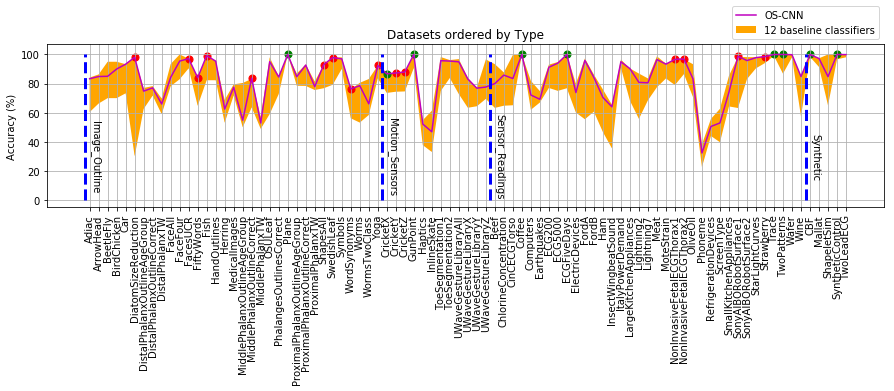

In [ ]:
result_path = './Full_result.csv'
file = pd.read_csv(result_path)
dataset_type_list= [Image_Outline, Motion_Sensors, Sensor_Readings,Synthetic]
dataset_type_name_list= ['Image_Outline', 'Motion_Sensors', 'Sensor_Readings','Synthetic']


df = pd.DataFrame({'Classifier': get_result_list})
df = df.T

big_result_block = []
name_list = []

for dataset_type_index,dataset_type in enumerate(dataset_type_list):

    data_name_list = dataset_type
    result_block = np.zeros([len(data_name_list),len(get_result_list)])
    for i,data_name in enumerate(data_name_list):
        dfb = file[file['dataset_name']==data_name].index.values.astype(int)    
        for j, Baseline_name in enumerate (get_result_list):
            temp = file.iloc[dfb][Baseline_name]
            temp = string2pair(temp.values[0])
            result_block[i,j] = temp[0]
            
    if len(big_result_block)==0:
        big_result_block = result_block
        name_list = dataset_type
    else:
        name_list = name_list+dataset_type
        big_result_block = np.concatenate((big_result_block,result_block),axis=0,)
    
    average_rank, wins= get_average_rank_and_wins(result_block)
    
    wins2= np.round(wins*100/len(data_name_list),2)

draw_a_weasel_graph(big_result_block,name_list,dataset_class_name=[dataset_type_list,dataset_type_name_list], main_classifer_name= 'OS-CNN')

# **Compare result TSC of Cryptocurrency Price Trend Based on OS-CNN**
**Dataset**
1. BTC
2. ETH
3. LTC
4. XRP
5. BNB
6. ADA
7. DOT
8. LINK

**Model**
1. MACNN
2. INCEPTIONTIME
3. RESNET
4. ROCKET

#### **MACNN** 

**Split train 70% validation 15% test 15%**

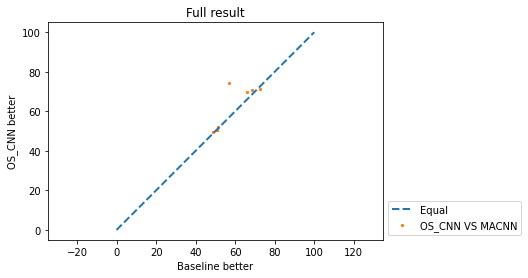

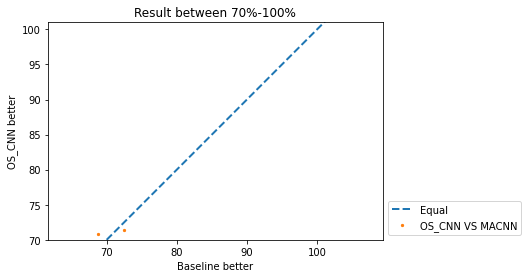

In [10]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

def Dwaw_acc_Vs_acc(model_acc, Baseline_acc, model_name,Baseline_name):
    fig = plt.figure()
    plt.xlabel('Baseline better')
    plt.ylabel(model_name+' better')
    plt.plot([0,100], [0,100], '--', linewidth=2, markersize=0, label ='Equal',c ='C0')
    plt.axis('equal')
    plt.scatter(Baseline_acc*100,model_acc*100,label = model_name+' VS '+Baseline_name, s =5, c ='C1')
    plt.legend(loc='lower left', bbox_to_anchor=(1, 0))
    plt.title("Full result")
    
    fig = plt.figure()
    plt.xlabel('Baseline better')
    plt.ylabel(model_name+' better')
    plt.plot([70,105], [70,105], '--', linewidth=2, markersize=0, label ='Equal',c ='C0')
    plt.axis('equal')
    plt.scatter(Baseline_acc*100,model_acc*100,label = model_name+' VS '+Baseline_name, s =5, c ='C1')
    plt.legend(loc='lower left', bbox_to_anchor=(1, 0))
    plt.axis([70,101,70,101])
    plt.title("Result between 70%-100%")
    plt.show()

result_path = '/content/gdrive/MyDrive/Split.csv'
file = pd.read_csv(result_path)
InceptionTime_Acc = file['MACNN'].to_numpy()
OS_Acc = file['OS_CNN'].to_numpy()
Dwaw_acc_Vs_acc(OS_Acc,InceptionTime_Acc,'OS_CNN','MACNN')

**Walk forward 1**

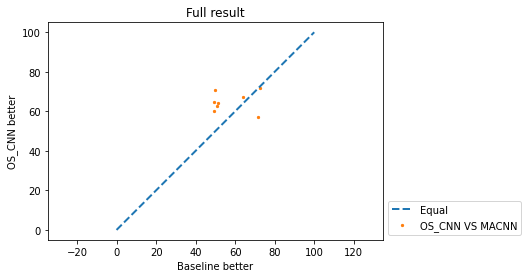

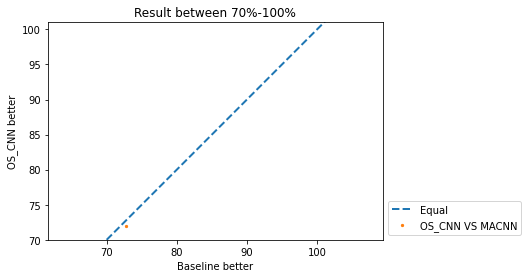

In [13]:
result_path = '/content/gdrive/MyDrive/WF1.csv'
file = pd.read_csv(result_path)
InceptionTime_Acc = file['MACNN'].to_numpy()
OS_Acc = file['OS_CNN'].to_numpy()
Dwaw_acc_Vs_acc(OS_Acc,InceptionTime_Acc,'OS_CNN','MACNN')

**Walk forward 2**

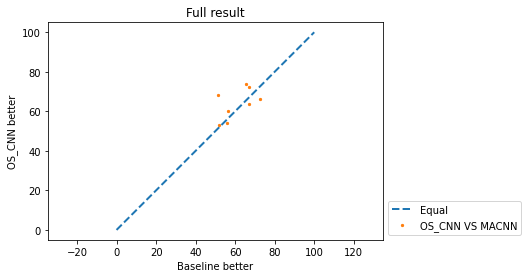

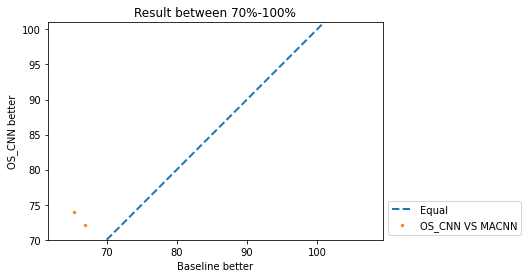

In [12]:
result_path = '/content/gdrive/MyDrive/WF2.csv'
file = pd.read_csv(result_path)
InceptionTime_Acc = file['MACNN'].to_numpy()
OS_Acc = file['OS_CNN'].to_numpy()
Dwaw_acc_Vs_acc(OS_Acc,InceptionTime_Acc,'OS_CNN','MACNN')

#### **InceptionTime** 

**Split train 70% validation 15% test 15%**

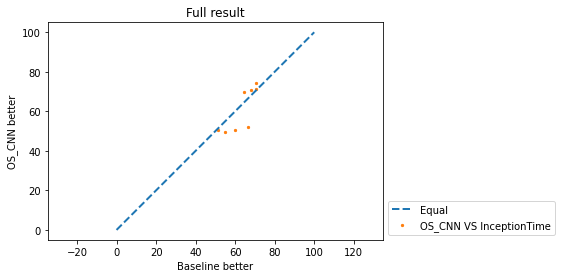

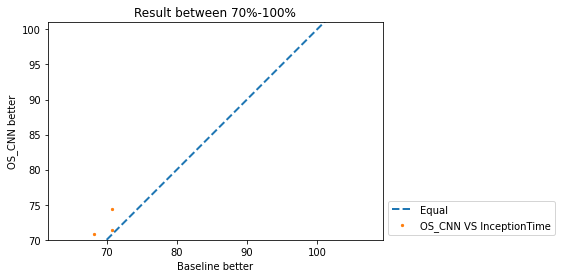

In [16]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

def Dwaw_acc_Vs_acc(model_acc, Baseline_acc, model_name,Baseline_name):
    fig = plt.figure()
    plt.xlabel('Baseline better')
    plt.ylabel(model_name+' better')
    plt.plot([0,100], [0,100], '--', linewidth=2, markersize=0, label ='Equal',c ='C0')
    plt.axis('equal')
    plt.scatter(Baseline_acc*100,model_acc*100,label = model_name+' VS '+Baseline_name, s =5, c ='C1')
    plt.legend(loc='lower left', bbox_to_anchor=(1, 0))
    plt.title("Full result")
    
    fig = plt.figure()
    plt.xlabel('Baseline better')
    plt.ylabel(model_name+' better')
    plt.plot([70,105], [70,105], '--', linewidth=2, markersize=0, label ='Equal',c ='C0')
    plt.axis('equal')
    plt.scatter(Baseline_acc*100,model_acc*100,label = model_name+' VS '+Baseline_name, s =5, c ='C1')
    plt.legend(loc='lower left', bbox_to_anchor=(1, 0))
    plt.axis([70,101,70,101])
    plt.title("Result between 70%-100%")
    plt.show()

result_path = '/content/gdrive/MyDrive/Split.csv'
file = pd.read_csv(result_path)
InceptionTime_Acc = file['InceptionTime'].to_numpy()
OS_Acc = file['OS_CNN'].to_numpy()
Dwaw_acc_Vs_acc(OS_Acc,InceptionTime_Acc,'OS_CNN','InceptionTime')

**Walk forward 1**

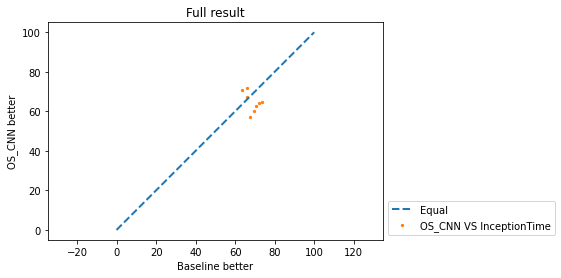

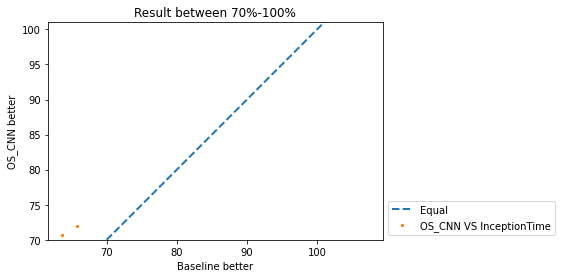

In [17]:
result_path = '/content/gdrive/MyDrive/WF1.csv'
file = pd.read_csv(result_path)
InceptionTime_Acc = file['InceptionTime'].to_numpy()
OS_Acc = file['OS_CNN'].to_numpy()
Dwaw_acc_Vs_acc(OS_Acc,InceptionTime_Acc,'OS_CNN','InceptionTime')

**Walk forward 2**

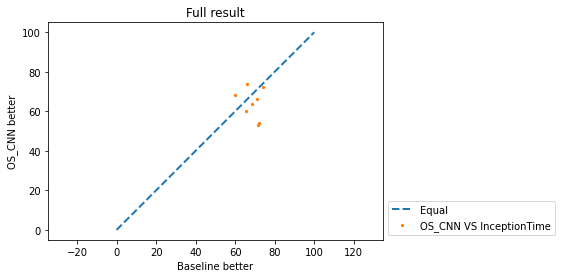

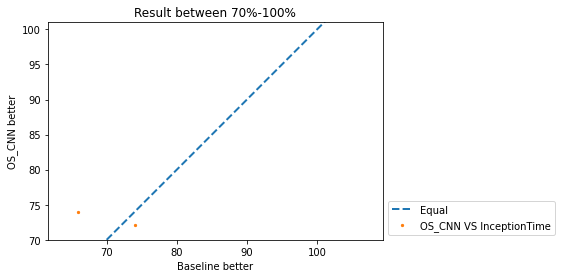

In [18]:
result_path = '/content/gdrive/MyDrive/WF2.csv'
file = pd.read_csv(result_path)
InceptionTime_Acc = file['InceptionTime'].to_numpy()
OS_Acc = file['OS_CNN'].to_numpy()
Dwaw_acc_Vs_acc(OS_Acc,InceptionTime_Acc,'OS_CNN','InceptionTime')

#### **RESNET** 

**Split train 70% validation 15% test 15%**

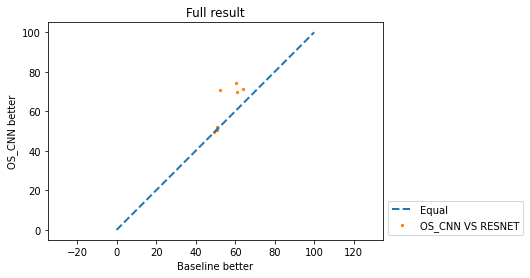

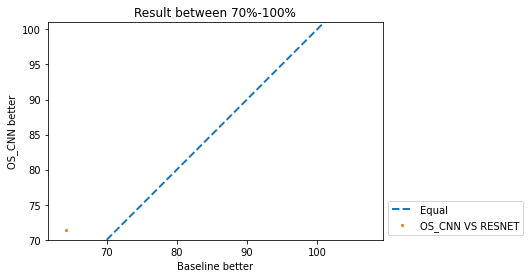

In [14]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

def Dwaw_acc_Vs_acc(model_acc, Baseline_acc, model_name,Baseline_name):
    fig = plt.figure()
    plt.xlabel('Baseline better')
    plt.ylabel(model_name+' better')
    plt.plot([0,100], [0,100], '--', linewidth=2, markersize=0, label ='Equal',c ='C0')
    plt.axis('equal')
    plt.scatter(Baseline_acc*100,model_acc*100,label = model_name+' VS '+Baseline_name, s =5, c ='C1')
    plt.legend(loc='lower left', bbox_to_anchor=(1, 0))
    plt.title("Full result")
    
    fig = plt.figure()
    plt.xlabel('Baseline better')
    plt.ylabel(model_name+' better')
    plt.plot([70,105], [70,105], '--', linewidth=2, markersize=0, label ='Equal',c ='C0')
    plt.axis('equal')
    plt.scatter(Baseline_acc*100,model_acc*100,label = model_name+' VS '+Baseline_name, s =5, c ='C1')
    plt.legend(loc='lower left', bbox_to_anchor=(1, 0))
    plt.axis([70,101,70,101])
    plt.title("Result between 70%-100%")
    plt.show()

result_path = '/content/gdrive/MyDrive/Split.csv'
file = pd.read_csv(result_path)
InceptionTime_Acc = file['RESNET'].to_numpy()
OS_Acc = file['OS_CNN'].to_numpy()
Dwaw_acc_Vs_acc(OS_Acc,InceptionTime_Acc,'OS_CNN','RESNET')

**Walk forward 1**

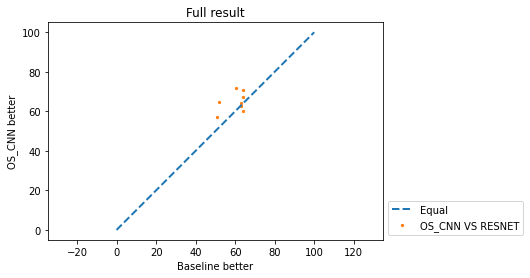

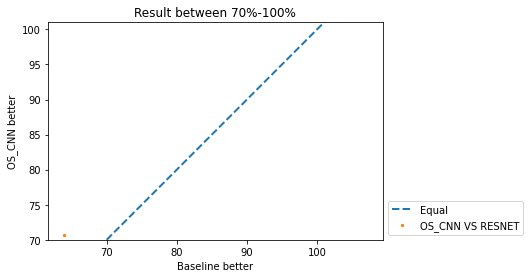

In [15]:
result_path = '/content/gdrive/MyDrive/WF1.csv'
file = pd.read_csv(result_path)
InceptionTime_Acc = file['RESNET'].to_numpy()
OS_Acc = file['OS_CNN'].to_numpy()
Dwaw_acc_Vs_acc(OS_Acc,InceptionTime_Acc,'OS_CNN','RESNET')

**Walk forward 2**

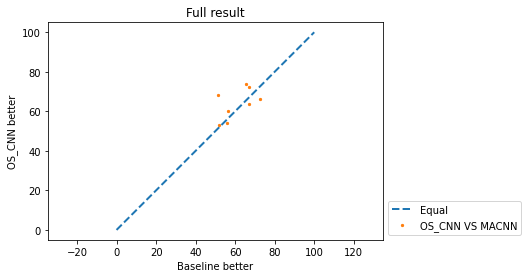

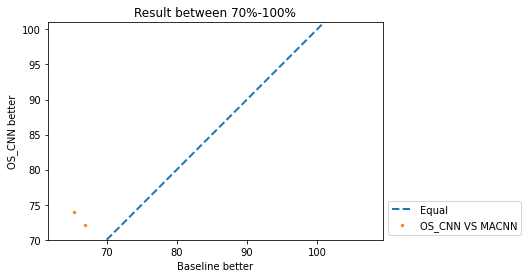

In [ ]:
result_path = '/content/gdrive/MyDrive/WF2.csv'
file = pd.read_csv(result_path)
InceptionTime_Acc = file['MACNN'].to_numpy()
OS_Acc = file['OS_CNN'].to_numpy()
Dwaw_acc_Vs_acc(OS_Acc,InceptionTime_Acc,'OS_CNN','MACNN')

#### **ROCKET** 

**Split train 70% validation 15% test 15%**

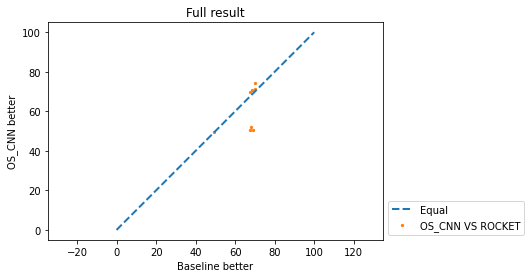

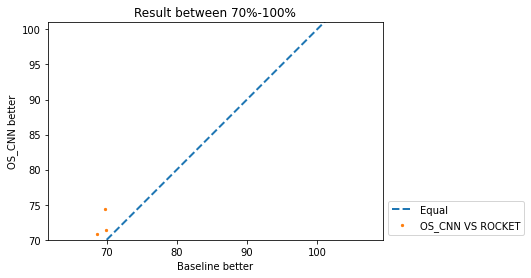

In [19]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

def Dwaw_acc_Vs_acc(model_acc, Baseline_acc, model_name,Baseline_name):
    fig = plt.figure()
    plt.xlabel('Baseline better')
    plt.ylabel(model_name+' better')
    plt.plot([0,100], [0,100], '--', linewidth=2, markersize=0, label ='Equal',c ='C0')
    plt.axis('equal')
    plt.scatter(Baseline_acc*100,model_acc*100,label = model_name+' VS '+Baseline_name, s =5, c ='C1')
    plt.legend(loc='lower left', bbox_to_anchor=(1, 0))
    plt.title("Full result")
    
    fig = plt.figure()
    plt.xlabel('Baseline better')
    plt.ylabel(model_name+' better')
    plt.plot([70,105], [70,105], '--', linewidth=2, markersize=0, label ='Equal',c ='C0')
    plt.axis('equal')
    plt.scatter(Baseline_acc*100,model_acc*100,label = model_name+' VS '+Baseline_name, s =5, c ='C1')
    plt.legend(loc='lower left', bbox_to_anchor=(1, 0))
    plt.axis([70,101,70,101])
    plt.title("Result between 70%-100%")
    plt.show()

result_path = '/content/gdrive/MyDrive/Split.csv'
file = pd.read_csv(result_path)
InceptionTime_Acc = file['ROCKET'].to_numpy()
OS_Acc = file['OS_CNN'].to_numpy()
Dwaw_acc_Vs_acc(OS_Acc,InceptionTime_Acc,'OS_CNN','ROCKET')

**Walk forward 1**

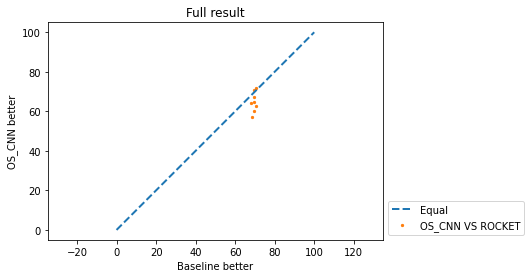

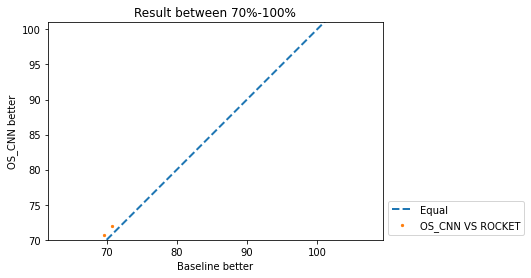

In [20]:
result_path = '/content/gdrive/MyDrive/WF1.csv'
file = pd.read_csv(result_path)
InceptionTime_Acc = file['ROCKET'].to_numpy()
OS_Acc = file['OS_CNN'].to_numpy()
Dwaw_acc_Vs_acc(OS_Acc,InceptionTime_Acc,'OS_CNN','ROCKET')

**Walk forward 2**

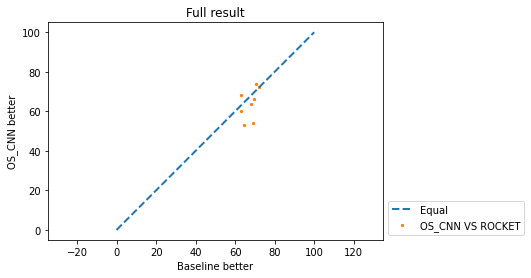

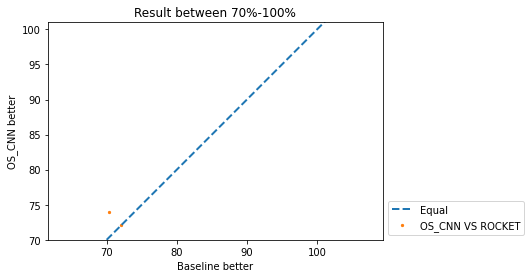

In [21]:
result_path = '/content/gdrive/MyDrive/WF2.csv'
file = pd.read_csv(result_path)
InceptionTime_Acc = file['ROCKET'].to_numpy()
OS_Acc = file['OS_CNN'].to_numpy()
Dwaw_acc_Vs_acc(OS_Acc,InceptionTime_Acc,'OS_CNN','ROCKET')

## **Compare result**

#### **Split train 70% validation 15% test 15%**

In [120]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from scipy.stats import rankdata

def string2pair(information):
    if type(information) == np.float64:
        mean = information
        std = 0
    else:
        information = information.strip()
        information = information.strip(')')
        result = information.split('(')
        mean = float(result[0])
        std = float(result[1])
    return (mean,std)

# deep learning classifier:
# USE MODEL
get_result_list = ['OS_CNN', 'MACNN', 'InceptionTime', 'RESNET','ROCKET']

print(get_result_list)

['OS_CNN', 'MACNN', 'InceptionTime', 'RESNET', 'ROCKET']


In [121]:
result_path = '/content/gdrive/MyDrive/Split.csv'

file = pd.read_csv(result_path)
result_block = np.zeros([file.shape[0],len(get_result_list)])
for i in range(file.shape[0]):
    data_name = file['dataset_name'][i]
    print(i, ':', data_name)
    for j, keras_Baseline in enumerate (get_result_list):
        # print(j)
        # print(keras_Baseline)
        temp = string2pair(file[keras_Baseline][i])
        print(f'temp : {temp}')
        result_block[i,j] = temp[0]

print(f'result_block : {result_block}')
print('average accuracy', np.mean(result_block,axis=0))

0 : BTC
temp : (0.507326155589735, 0)
temp : (0.510285066407515, 0)
temp : (0.510770975056689, 0)
temp : (0.50631783573627, 0)
temp : (0.675332037576935, 0)
1 : ETH
temp : (0.493883932677274, 0)
temp : (0.487490802060338, 0)
temp : (0.550772626931567, 0)
temp : (0.494849153789551, 0)
temp : (0.49213648487078, 0)
2 : XRP
temp : (0.708559397522066, 0)
temp : (0.687540453074433, 0)
temp : (0.681538461538461, 0)
temp : (0.522541481181707, 0)
temp : (0.686391969562049, 0)
3 : LTC
temp : (0.713550448132043, 0)
temp : (0.724046140195208, 0)
temp : (0.706983760759606, 0)
temp : (0.641963255524984, 0)
temp : (0.698367636621717, 0)
4 : BNB
temp : (0.518688725490196, 0)
temp : (0.513032812020852, 0)
temp : (0.666819993866912, 0)
temp : (0.509963212752912, 0)
temp : (0.679239497086783, 0)
5 : ADA
temp : (0.503657587548638, 0)
temp : (0.510578718108276, 0)
temp : (0.6, 0)
temp : (0.503579209461562, 0)
temp : (0.691613505523572, 0)
6 : DOT
temp : (0.743769968051118, 0)
temp : (0.569147237304375, 0)


In [124]:
# def get_maxest_index(result_block):
#     index = np.argsort(result_block,axis = 1)   # sort ascending น้อยไปมาก
#     print(f'index : {index}')
#     temp = np.zeros(result_block.shape)
#     print(f'temp : {temp}')
#     for i in range(result_block.shape[0]):
#         l = result_block[i,:]
#         print(f'l : {l}')
#         temp[i,:] = rankdata(l,method='min')   # order by index variable
#         print(f'temp[i,:] 1 : {temp[i,:]}')
#         temp[i,:] = rankdata(l)
#         print(f'temp[i,:] 2 : {temp[i,:]}')

# get_maxest_index(result_block)

In [123]:
def get_maxest_index(result_block):
    index = np.argsort(result_block,axis = 1)
    temp = np.zeros(result_block.shape)
    for i in range(result_block.shape[0]):
        l=result_block[i,:]
        temp[i,:] = rankdata(l,method='min')
        temp[i,:] = rankdata(l)
    return temp

def get_average_rank_and_wins(result_block):
    max_index_result = get_maxest_index(-result_block)    # invererse order
    # print(f'max_index_result : {max_index_result}')
    average_rank =  np.around( np.average(max_index_result,axis=0), decimals=6)
    # print(f'average_rank : {average_rank}')
    wins = np.count_nonzero(max_index_result==1, axis = 0)   # นับอันดับสูงสุด = 1 นับ เป็น matrix
    # print(f'wins : {wins}')
    return average_rank, wins

average_rank, wins= get_average_rank_and_wins(result_block)

print('average rank',average_rank)
print('wins', wins)
# 0 : OS_CNN, 1 : MACNN, 2 : InceptionTime, 3 : RESNET, 4 : ROCKET

average rank [2.375 3.25  2.5   4.5   2.375]
wins [3 1 1 0 3]


In [125]:
def blod_min(array):
    blod_val = min(array)
    output_result = []
    for i in array:
        if i == blod_val:
            element_str = 'blodstart '+str(i)+' blodend'
        else:
            element_str = str(i)
        output_result.append(element_str)    
    return output_result

def blod_max(array):
    blod_val = max(array)
    output_result = []
    for i in array:
        if i == blod_val:
            element_str = 'blodstart '+str(i)+' blodend'
        else:
            element_str = str(i)
        output_result.append(element_str)    
    return output_result


df = pd.DataFrame({'Classifier': get_result_list})
df = df.T

df.loc['Average rank'] = average_rank
df.loc['Counts of wins'] = wins
print(df.index[df.index=='Average rank'])
print(df,end='\n\n')

df = pd.DataFrame({'Classifier': get_result_list})
df = df.T

average_accuracy_dp = np.round(np.mean(result_block,axis=0),2)

df.loc['Average rank'] = blod_min(average_rank)
df.loc['Counts of wins'] = blod_max(wins)
df.loc['Average accuracy(\%)'] = blod_max(average_accuracy_dp)

z = df.to_latex(header = None)
z = z.replace("blodstart ", "\\textbf{")
z = z.replace(" blodend ", "}")
z = z.replace("\\\\", " \\\\ \hline")
z = z.replace("\\toprule", "\hline")
z = z.replace("\\bottomrule", "")
z = z.replace("l"*(df.shape[1]+1), "|l"*(df.shape[1]+1)+"|")

print(z)

Index(['Average rank'], dtype='object')
                     0      1              2       3       4
Classifier      OS_CNN  MACNN  InceptionTime  RESNET  ROCKET
Average rank     2.375   3.25            2.5     4.5   2.375
Counts of wins       3      1              1       0       3

\begin{tabular}{|l|l|l|l|l|l|}
\hline
Classifier           &                   OS\_CNN &  MACNN &  InceptionTime &  RESNET &                   ROCKET  \\ \hline
Average rank         &  \textbf{2.375}&   3.25 &            2.5 &     4.5 &  \textbf{2.375} \\ \hline
Counts of wins       &      \textbf{3}&      1 &              1 &       0 &      \textbf{3} \\ \hline
Average accuracy(\textbackslash \%) &                     0.61 &   0.58 &           0.63 &    0.55 &   \textbf{0.66} \\ \hline

\end{tabular}



df :                         0            1     2
Classifier  Baseline wins  ROCKET wins  Same
temp[:,0] : [0.51 0.49 0.71 0.71 0.52 0.5  0.74 0.7 ]
temp[:,1] : [0.68 0.49 0.69 0.7  0.68 0.69 0.7  0.67]
OS_CNN WilcoxonResult(statistic=10.0, pvalue=0.49896229860376107)
temp[:,0] : [0.51 0.49 0.69 0.72 0.51 0.51 0.57 0.66]
temp[:,1] : [0.68 0.49 0.69 0.7  0.68 0.69 0.7  0.67]
MACNN WilcoxonResult(statistic=2.0, pvalue=0.07393743585215212)
temp[:,0] : [0.51 0.55 0.68 0.71 0.67 0.6  0.71 0.65]
temp[:,1] : [0.68 0.49 0.69 0.7  0.68 0.69 0.7  0.67]
InceptionTime WilcoxonResult(statistic=12.0, pvalue=0.39849225895384943)
temp[:,0] : [0.51 0.49 0.52 0.64 0.51 0.5  0.61 0.61]
temp[:,1] : [0.68 0.49 0.69 0.7  0.68 0.69 0.7  0.67]
RESNET WilcoxonResult(statistic=0.0, pvalue=0.01775592261403605)
                                 0                    1     2
Classifier           Baseline wins          ROCKET wins  Same
OS_CNN         blodstart 4 blodend                    3     1
MACNN              

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


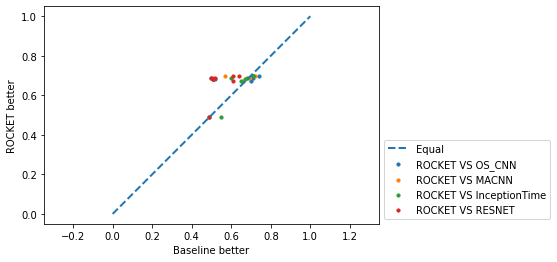

In [126]:
df = pd.DataFrame({'Classifier': ['Baseline wins',get_result_list[-1]+' wins','Same']})
df = df.T

print(f'df : {df}')

fig = plt.figure()
plt.xlabel('Baseline better')
plt.ylabel(get_result_list[-1]+' better')
plt.plot([0, 1], [0, 1], '--', linewidth=2, markersize=0, label ='Equal',c ='C0')
plt.axis('equal')
for i in range(len(get_result_list)-1):
    temp = result_block[:,[i,-1]]
    temp = np.around(result_block[:,[i,-1]], decimals=2)
    print(f'temp[:,0] : {temp[:,0]}')
    print(f'temp[:,1] : {temp[:,1]}')
    print(get_result_list[i],wilcoxon(temp[:,0],temp[:,1]))   
    # if p-value <= 0.5 is difference x and y =>, reject null hypothesis (H0)  http://file.siam2web.com/natcha/531/2011926_67308.pdf

    max_index_temp = get_maxest_index(-temp)
    wins = np.count_nonzero(max_index_temp<2, axis = 0)
    count_same = ( wins[0] + wins[1] - 8 )   # 8 dataset cryptocurrency

    loss_win_tie = [wins[0] - count_same, wins[1] - count_same, count_same]    
    df.loc[get_result_list[i]] = blod_max(loss_win_tie)
    plt.scatter(temp[:,0],temp[:,1],label = get_result_list[-1]+' VS '+get_result_list[i], s =10)
    plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

print(df)
z = df.to_latex(header = None)
z = z.replace("blodstart ", "\\textbf{")
z = z.replace(" blodend ", "}")
z = z.replace("\\\\", " \\\\ \hline")
z = z.replace("\\toprule", "\hline")
z = z.replace("\\bottomrule", "")
z = z.replace("l"*(df.shape[1]+1), "|l"*(df.shape[1]+1)+"|")
print(z)

fig.savefig("/content/gdrive/MyDrive/Colab Notebooks/Compare result/result_compare_split.pdf", bbox_inches='tight')

In [127]:
df = pd.DataFrame(['classifier_name','dataset_name','accuracy'])
df = df.T
dataset_name_list = file['dataset_name']
#print(dataset_name_list)
for j,classifier_name in enumerate(get_result_list):
    for i,dataset_name in enumerate(dataset_name_list):
        #print(classifier_name,i,result_block[i,j])
        #print(classifier_name,i,result_block[i,j])
        df = df.append([[classifier_name,i,result_block[i,j]]]) 

example_path = '/content/gdrive/MyDrive/Colab Notebooks/Compare result/example_split.csv'
df.to_csv(example_path,index=False,header =False )

In [50]:
def draw_a_weasel_graph(result_block,dataset_list,dataset_class_name, main_classifer_name):
    dataset_type_list = dataset_class_name[0]
    dataset_type_name_list = dataset_class_name[1]
    z = [0]
    for i in dataset_type_list:
        z.append(len(i))

    
    orange_name = str(result_block.shape[1]-1)+" baseline classifiers"
    
    Last_results = result_block[:,-1]
    Other_result = result_block[:,0:-1]
    lowst_line = np.amin(Other_result,axis=1)
    highest_line = np.amax(Other_result,axis=1)
    
    larger_ind = Last_results>highest_line
    equal_ind = Last_results==highest_line 
    
    x_index_list = np.asarray(list(range(result_block.shape[0])))

    f = plt.figure(figsize=(15,3))
    ax = f.add_subplot(111)
    ax.fill_between(x_index_list, lowst_line, highest_line,facecolor='orange',label=orange_name)
    ax.plot(x_index_list, Last_results,'m-',label=main_classifer_name)
    ax.set_xticks(x_index_list) # make sure there is only 1 tick per value
    ax.set_xticklabels(dataset_list,rotation='vertical')
    ax.set_ylabel("Accuracy (%)")
    ax.set_title("Datasets ordered by Type")
    
    ax.scatter(x_index_list[larger_ind],Last_results[larger_ind], c = 'r',s =50, marker='o')
    ax.scatter(x_index_list[equal_ind],Last_results[equal_ind],c = 'g',s =50, marker = 'o')
    ax.grid(True)
    ax.legend(loc='lower right', bbox_to_anchor=(1, 1))
    #center lower
    iloc = 0
    for ind,i in enumerate(z[:-1]):
        iloc = iloc+i
        ax.plot([iloc-0.5,iloc-0.5], [0,100], 'b--', linewidth=3, markersize=0)
        ax.text(iloc, 30, dataset_type_name_list[ind],
         rotation=-90,
         horizontalalignment='left',
         verticalalignment='center',
         multialignment='center')

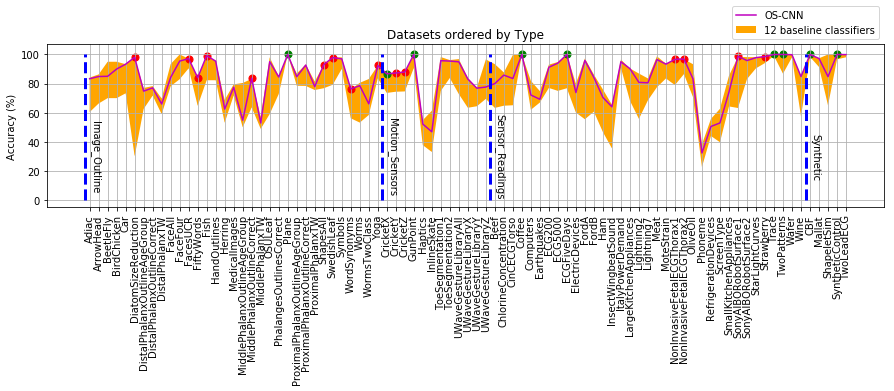

In [ ]:
result_path = './Full_result.csv'
file = pd.read_csv(result_path)
dataset_type_list= [Image_Outline, Motion_Sensors, Sensor_Readings,Synthetic]
dataset_type_name_list= ['Image_Outline', 'Motion_Sensors', 'Sensor_Readings','Synthetic']

df = pd.DataFrame({'Classifier': get_result_list})
df = df.T

big_result_block = []
name_list = []

for dataset_type_index,dataset_type in enumerate(dataset_type_list):

    data_name_list = dataset_type
    result_block = np.zeros([len(data_name_list),len(get_result_list)])
    for i,data_name in enumerate(data_name_list):
        dfb = file[file['dataset_name']==data_name].index.values.astype(int)    
        for j, Baseline_name in enumerate (get_result_list):
            temp = file.iloc[dfb][Baseline_name]
            temp = string2pair(temp.values[0])
            result_block[i,j] = temp[0]
            
    if len(big_result_block)==0:
        big_result_block = result_block
        name_list = dataset_type
    else:
        name_list = name_list+dataset_type
        big_result_block = np.concatenate((big_result_block,result_block),axis=0,)
    
    average_rank, wins= get_average_rank_and_wins(result_block)
    
    wins2= np.round(wins*100/len(data_name_list),2)

draw_a_weasel_graph(big_result_block,name_list,dataset_class_name=[dataset_type_list,dataset_type_name_list], main_classifer_name= 'OS-CNN')

In [ ]:
Image_Outline =['Adiac',
'ArrowHead',
'BeetleFly',
'BirdChicken',
'Car',
'DiatomSizeReduction',
'DistalPhalanxOutlineAgeGroup',
'DistalPhalanxOutlineCorrect',
'DistalPhalanxTW',
'FaceAll',
'FaceFour',
'FacesUCR',
'FiftyWords',
'Fish',
'HandOutlines',
'Herring',
'MedicalImages',
'MiddlePhalanxOutlineAgeGroup',
'MiddlePhalanxOutlineCorrect',
'MiddlePhalanxTW',
'OSULeaf',
'PhalangesOutlinesCorrect',
'Plane',
'ProximalPhalanxOutlineAgeGroup',
'ProximalPhalanxOutlineCorrect',
'ProximalPhalanxTW',
'ShapesAll',
'SwedishLeaf',
'Symbols',
'WordSynonyms',
'Worms',
'WormsTwoClass',
'Yoga'
 ]

Motion_Sensors = ['CricketX',
'CricketY',
'CricketZ',
'GunPoint',
'Haptics',
'InlineSkate',
'ToeSegmentation1',
'ToeSegmentation2',
'UWaveGestureLibraryAll',
'UWaveGestureLibraryX',
'UWaveGestureLibraryY',
'UWaveGestureLibraryZ']

Sensor_Readings=['Beef',
'ChlorineConcentration',
'CinCECGTorso',
'Coffee',
'Computers',
'Earthquakes',
'ECG200',
'ECG5000',
'ECGFiveDays',
'ElectricDevices',
'FordA',
'FordB',
'Ham',
'InsectWingbeatSound',
'ItalyPowerDemand',
'LargeKitchenAppliances',
'Lightning2',
'Lightning7',
'Meat',
'MoteStrain',
'NonInvasiveFetalECGThorax1',
'NonInvasiveFetalECGThorax2',
'OliveOil',
'Phoneme',
'RefrigerationDevices',
'ScreenType',
'SmallKitchenAppliances',
'SonyAIBORobotSurface1',
'SonyAIBORobotSurface2',
'StarLightCurves',
'Strawberry',
'Trace',
'TwoPatterns',
'Wafer',
'Wine']

Synthetic=['CBF',
         'Mallat',
          'ShapeletSim',
          'SyntheticControl',
          'TwoLeadECG'
          ]











In [ ]:
result_path = './Full_result.csv'

file = pd.read_csv(result_path)
dataset_type_list= [Image_Outline, Motion_Sensors, Sensor_Readings,Synthetic]
dataset_type_name_list= ['Image_Outline', 'Motion_Sensors', 'Sensor_Readings','Synthetic']



df = pd.DataFrame({'Classifier': get_result_list})
df = df.T


for dataset_type_index,dataset_type in enumerate(dataset_type_list):
    data_name_list = dataset_type
    result_block = np.zeros([len(data_name_list),len(get_result_list)])
    for i,data_name in enumerate(data_name_list):
        dfb = file[file['dataset_name']==data_name].index.values.astype(int)
        for j, keras_Baseline in enumerate (get_result_list):
            temp = file.iloc[dfb][keras_Baseline]
            temp = string2pair(temp.values[0])
            result_block[i,j] = temp[0]
    average_rank, wins= get_average_rank_and_wins(result_block)
    #temp = np.round(wins*100/np.sum(wins),2)
    #print(average_rank, wins)
    df.loc[dataset_type_name_list[dataset_type_index]+'('+str(len(dataset_type))+')'] = blod_min(average_rank)


z = df.to_latex(header = None)
z = z.replace("blodstart ", "\\textbf{")
z = z.replace(" blodend ", "}")
z = z.replace("\\\\", " \\\\ \hline")
z = z.replace("\\toprule", "\hline")
z = z.replace("\\bottomrule", "")
z = z.replace("l"*(df.shape[1]+1), "|l"*(df.shape[1]+1)+"|")
print(z)

\begin{tabular}{|l|l|l|l|l|l|l|l|l|l|l|l|l|l|}
\hline
Classifier          &       FCN &    ResNet &  1-NN DTW CV &   1-NN DTW &      BOSS &    WEASEL &  Flat-COTE &  HIVE-COTE &               InceptionTime &  Inception &    OS-CNN &  OS-CNN-ENS(5) &               OS-CNN-ENS(8)  \\ \hline
Image\_Outline(33)   &  7.939394 &  7.575758 &    11.227273 &  11.409091 &  7.681818 &  6.030303 &   7.075758 &   5.272727 &                    4.651515 &   6.606061 &  6.757576 &        4.69697 &  \textbf{4.075758} \\ \hline
Motion\_Sensors(12)  &  9.583333 &  9.333333 &    10.333333 &  11.666667 &  8.583333 &  7.916667 &   5.916667 &   3.916667 &                        4.25 &   5.583333 &      6.25 &       4.166667 &       \textbf{3.5} \\ \hline
Sensor\_Readings(35) &  7.614286 &  6.214286 &    10.628571 &  11.428571 &  8.614286 &  6.571429 &   5.771429 &   5.042857 &  \textbf{4.914286}&   6.142857 &  7.342857 &       5.657143 &                    5.057143  \\ \hline
Synthetic(5)        &       8.4 &

In [ ]:
Size_1_to_100 =[
'ItalyPowerDemand',
'SyntheticControl',
'SonyAIBORobotSurface2',
'SonyAIBORobotSurface1',
'DistalPhalanxOutlineAgeGroup',
'DistalPhalanxOutlineCorrect',
'DistalPhalanxTW',
'MiddlePhalanxOutlineAgeGroup',
'MiddlePhalanxOutlineCorrect',
'MiddlePhalanxTW',
'PhalangesOutlinesCorrect',
'ProximalPhalanxOutlineAgeGroup',
'ProximalPhalanxOutlineCorrect',
'ProximalPhalanxTW',
'TwoPatterns',
'MoteStrain',
'ECG200',
'ElectricDevices',
'MedicalImages',
]

Size_101_to_200=[
'CBF',
'SwedishLeaf',
'TwoLeadECG',
'FaceAll',
'FacesUCR',
'ECGFiveDays',
'ECG5000',
'Plane',
'GunPoint',
'Wafer',
'ChlorineConcentration',
'Adiac',

]

Size_201_to_300 =[
'Wine',
'Strawberry',
'ArrowHead',
'InsectWingbeatSound',
'FiftyWords',
'WordSynonyms',
'Trace',
'ToeSegmentation1',
'Coffee',
'CricketX',
'CricketY',
'CricketZ',
]

Size_301_to_400 =[
'UWaveGestureLibraryAll',
'UWaveGestureLibraryX',
'UWaveGestureLibraryY',
'Lightning7',
'ToeSegmentation2',
'DiatomSizeReduction',
'FaceFour',
]

Size_401_to_500 =[
'Symbols',
'Yoga',
'OSULeaf',
'Ham',
'Meat',
'Fish',
'Beef',
'FordA',
'FordB',
'ShapeletSim',
]
Size_501_to_600 =[
    'BeetleFly',
'BirdChicken',
'Car',
'Earthquakes',
'Herring',
'ShapesAll',
'OliveOil',
]
Size_601_to_ =[
'Lightning2',
'Computers',
'LargeKitchenAppliances',
'RefrigerationDevices',
'ScreenType',
'SmallKitchenAppliances',
'NonInvasiveFetalECGThorax1',
'NonInvasiveFetalECGThorax2',
'Worms',
'WormsTwoClass',
'UWaveGestureLibraryZ',
'Mallat',
'Phoneme',
'StarLightCurves',
'Haptics',
'CinCECGTorso',
'InlineSkate',
'HandOutlines',]


In [ ]:
file = pd.read_csv(result_path)
dataset_type_list= [
    Size_1_to_100, 
    Size_101_to_200, 
    Size_201_to_300,
    Size_301_to_400,
    Size_401_to_500,
    Size_501_to_600,
    Size_601_to_]

dataset_type_name_list= [
    'Size_1_to_100', 
    'Size_101_to_200', 
    'Size_201_to_300',
    'Size_301_to_400',
'Size_401_to_500',
'Size_501_to_600',
'Size_601_to_',
]



data_name_list = file['dataset_name']

df = pd.DataFrame({'Classifier': get_result_list})
df = df.T


for dataset_type_index,dataset_type in enumerate(dataset_type_list):

    data_name_list = dataset_type
    result_block = np.zeros([len(data_name_list),len(get_result_list)])
    for i,data_name in enumerate(data_name_list):
        dfb = file[file['dataset_name']==data_name].index.values.astype(int)
        for j, keras_Baseline in enumerate (get_result_list):
            temp = file.iloc[dfb][keras_Baseline]
            temp = string2pair(temp.values[0])
            result_block[i,j] = temp[0]
        
    average_rank, wins= get_average_rank_and_wins(result_block)
    print(average_rank, wins)
    #temp = np.round(wins*100/np.sum(wins),2)
    df.loc[dataset_type_name_list[dataset_type_index]+'('+str(len(dataset_type))+')'] = blod_min(average_rank)


z = df.to_latex(header = None)
z = z.replace("blodstart ", "\\textbf{")
z = z.replace(" blodend ", "}")
z = z.replace("\\\\", " \\\\ \hline")
z = z.replace("\\toprule", "\hline")
z = z.replace("\\bottomrule", "")
z = z.replace("l"*(df.shape[1]+1), "|l"*(df.shape[1]+1)+"|")
print(z)

[ 7.578947  6.631579 11.447368 11.526316  8.973684  6.184211  5.763158
  4.973684  4.552632  6.657895  7.131579  5.184211  4.394737] [1 0 0 1 1 0 4 1 6 0 0 0 2]
[ 6.666667  7.541667 10.625    10.666667  8.666667  7.        7.333333
  6.625     4.875     6.5       5.833333  4.416667  4.25    ] [1 0 0 0 0 2 0 0 2 0 0 0 2]
[ 9.041667  8.541667 10.416667 11.291667  9.708333  6.958333  6.708333
  4.958333  5.375     6.125     5.458333  3.458333  2.958333] [0 0 0 0 0 1 0 3 0 0 0 0 5]
[10.        8.285714 10.428571 11.142857  6.928571  8.071429  8.428571
  4.071429  4.214286  5.857143  6.        4.285714  3.285714] [0 0 0 0 1 1 0 2 1 0 0 0 1]
[ 9.6   6.9  11.55 12.25  6.5   7.1   7.05  3.95  4.9   6.4   6.4   4.5
  3.9 ] [0 3 0 0 0 1 0 1 2 0 0 0 2]
[ 7.        7.       10.428571 11.571429  6.        5.357143  6.285714
  5.142857  5.571429  6.285714  8.        6.642857  5.714286] [0 0 0 0 0 1 0 1 0 0 1 0 1]
[ 7.666667  6.277778 10.5      10.944444  8.694444  6.388889  5.055556
  4.888889  4.58

In [ ]:
def draw_a_weasel_graph(result_block,dataset_list,dataset_class_name, main_classifer_name):
    dataset_type_list = dataset_class_name[0]
    dataset_type_name_list = dataset_class_name[1]
    z = [0]
    for i in dataset_type_list:
        z.append(len(i))

    
    orange_name = str(result_block.shape[1]-1)+" baseline classifiers"
    
    Last_results = result_block[:,-1]
    Other_result = result_block[:,0:-1]
    lowst_line = np.amin(Other_result,axis=1)
    highest_line = np.amax(Other_result,axis=1)
    
    larger_ind = Last_results>highest_line
    equal_ind = Last_results==highest_line 
    
    x_index_list = np.asarray(list(range(result_block.shape[0])))

    f = plt.figure(figsize=(15,3))
    ax = f.add_subplot(111)
    ax.fill_between(x_index_list, lowst_line, highest_line,facecolor='orange',label=orange_name)
    ax.plot(x_index_list, Last_results,'m-',label=main_classifer_name)
    ax.set_xticks(x_index_list) # make sure there is only 1 tick per value
    ax.set_xticklabels(dataset_list,rotation='vertical')
    ax.set_ylabel("Accuracy (%)")
    ax.set_title("Datasets ordered by Type")
    
    ax.scatter(x_index_list[larger_ind],Last_results[larger_ind], c = 'r',s =50, marker='o')
    ax.scatter(x_index_list[equal_ind],Last_results[equal_ind],c = 'g',s =50, marker = 'o')
    ax.grid(True)
    ax.legend(loc='lower right', bbox_to_anchor=(1, 1))
    #center lower
    iloc = 0
    for ind,i in enumerate(z[:-1]):
        iloc = iloc+i
        ax.plot([iloc-0.5,iloc-0.5], [0,100], 'b--', linewidth=3, markersize=0)
        ax.text(iloc, 30, dataset_type_name_list[ind],
         rotation=-90,
         horizontalalignment='left',
         verticalalignment='center',
         multialignment='center')

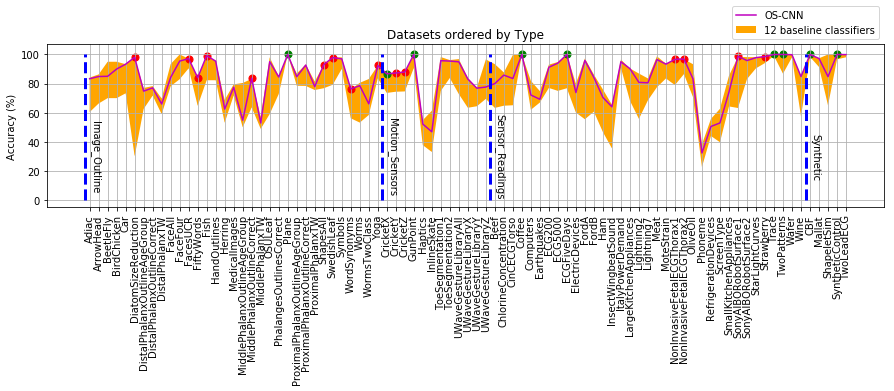

In [ ]:
result_path = './Full_result.csv'
file = pd.read_csv(result_path)
dataset_type_list= [Image_Outline, Motion_Sensors, Sensor_Readings,Synthetic]
dataset_type_name_list= ['Image_Outline', 'Motion_Sensors', 'Sensor_Readings','Synthetic']


df = pd.DataFrame({'Classifier': get_result_list})
df = df.T

big_result_block = []
name_list = []

for dataset_type_index,dataset_type in enumerate(dataset_type_list):

    data_name_list = dataset_type
    result_block = np.zeros([len(data_name_list),len(get_result_list)])
    for i,data_name in enumerate(data_name_list):
        dfb = file[file['dataset_name']==data_name].index.values.astype(int)    
        for j, Baseline_name in enumerate (get_result_list):
            temp = file.iloc[dfb][Baseline_name]
            temp = string2pair(temp.values[0])
            result_block[i,j] = temp[0]
            
    if len(big_result_block)==0:
        big_result_block = result_block
        name_list = dataset_type
    else:
        name_list = name_list+dataset_type
        big_result_block = np.concatenate((big_result_block,result_block),axis=0,)
    
    average_rank, wins= get_average_rank_and_wins(result_block)
    
    wins2= np.round(wins*100/len(data_name_list),2)

draw_a_weasel_graph(big_result_block,name_list,dataset_class_name=[dataset_type_list,dataset_type_name_list], main_classifer_name= 'OS-CNN')

#### **Walk Forward 1**

In [128]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from scipy.stats import rankdata

def string2pair(information):
    if type(information) == np.float64:
        mean = information
        std = 0
    else:
        information = information.strip()
        information = information.strip(')')
        result = information.split('(')
        mean = float(result[0])
        std = float(result[1])
    return (mean,std)


# deep learning classifier:
# USE MODEL
get_result_list = ['OS_CNN', 'MACNN', 'InceptionTime', 'RESNET','ROCKET']

print(get_result_list)

['OS_CNN', 'MACNN', 'InceptionTime', 'RESNET', 'ROCKET']


In [129]:
# result_path = './Full_result.csv'
result_path = '/content/gdrive/MyDrive/WF1.csv'

file = pd.read_csv(result_path)
result_block = np.zeros([file.shape[0],len(get_result_list)])
for i in range(file.shape[0]):
    data_name = file['dataset_name'][i]
    print(data_name)
    for j, keras_Baseline in enumerate (get_result_list):
        # print(j)
        # print(keras_Baseline)
        temp = string2pair(file[keras_Baseline][i])
        result_block[i,j] = temp[0]
print('average accuracy', np.mean(result_block,axis=0))

BTC
ETH
XRP
LTC
BNB
ADA
DOT
LINK
average accuracy [0.64841581 0.57394454 0.68537455 0.60122514 0.69458273]


In [130]:
def get_maxest_index(result_block):
    index = np.argsort(result_block,axis = 1)
    temp = np.zeros(result_block.shape)
    for i in range(result_block.shape[0]):
        l=result_block[i,:]
        temp[i,:] = rankdata(l,method='min')
        temp[i,:] = rankdata(l)
    return temp

def get_average_rank_and_wins(result_block):
    max_index_result = get_maxest_index(-result_block)
    average_rank =  np.around( np.average(max_index_result,axis=0), decimals=6)
    wins = np.count_nonzero(max_index_result==1, axis = 0)
    return average_rank, wins

average_rank, wins= get_average_rank_and_wins(result_block)

print('average rank',average_rank)
print('wins', wins)

# 0 : OS_CNN
# 1 : MACNN
# 2 : InceptionTime
# 3 : RESNET
# 4 : ROCKET

average rank [2.875 4.    2.375 3.875 1.875]
wins [1 2 3 0 2]


In [131]:
import pandas as pd
def blod_min(array):
    blod_val = min(array)
    output_result = []
    for i in array:
        if i == blod_val:
            element_str = 'blodstart '+str(i)+' blodend'
        else:
            element_str = str(i)
        output_result.append(element_str)    
    return output_result

def blod_max(array):
    blod_val = max(array)
    output_result = []
    for i in array:
        if i == blod_val:
            element_str = 'blodstart '+str(i)+' blodend'
        else:
            element_str = str(i)
        output_result.append(element_str)    
    return output_result


df = pd.DataFrame({'Classifier': get_result_list})
df = df.T

df.loc['Average rank'] = average_rank
df.loc['Counts of wins'] = wins
print(df.index[df.index=='Average rank'])
print(df,end='\n\n')

df = pd.DataFrame({'Classifier': get_result_list})
df = df.T

average_accuracy_dp = np.round(np.mean(result_block,axis=0),2)

df.loc['Average rank'] = blod_min(average_rank)
df.loc['Counts of wins'] = blod_max(wins)
df.loc['Average accuracy(\%)'] = blod_max(average_accuracy_dp)

z = df.to_latex(header = None)
z = z.replace("blodstart ", "\\textbf{")
z = z.replace(" blodend ", "}")
z = z.replace("\\\\", " \\\\ \hline")
z = z.replace("\\toprule", "\hline")
z = z.replace("\\bottomrule", "")
z = z.replace("l"*(df.shape[1]+1), "|l"*(df.shape[1]+1)+"|")

print(z)

Index(['Average rank'], dtype='object')
                     0      1              2       3       4
Classifier      OS_CNN  MACNN  InceptionTime  RESNET  ROCKET
Average rank     2.875    4.0          2.375   3.875   1.875
Counts of wins       1      2              3       0       2

\begin{tabular}{|l|l|l|l|l|l|}
\hline
Classifier           &  OS\_CNN &  MACNN &           InceptionTime &  RESNET &                   ROCKET  \\ \hline
Average rank         &   2.875 &    4.0 &                   2.375 &   3.875 &  \textbf{1.875} \\ \hline
Counts of wins       &       1 &      2 &     \textbf{3}&       0 &                        2  \\ \hline
Average accuracy(\textbackslash \%) &    0.65 &   0.57 &  \textbf{0.69}&     0.6 &   \textbf{0.69} \\ \hline

\end{tabular}



temp[:,0] : [0.57 0.6  0.71 0.62 0.64 0.65 0.72 0.67]
temp[:,1] : [0.68 0.7  0.7  0.7  0.68 0.69 0.71 0.69]
OS_CNN WilcoxonResult(statistic=3.0, pvalue=0.03546586462402558)
temp[:,0] : [0.71 0.49 0.5  0.51 0.51 0.49 0.73 0.64]
temp[:,1] : [0.68 0.7  0.7  0.7  0.68 0.69 0.71 0.69]
MACNN WilcoxonResult(statistic=3.0, pvalue=0.03546586462402558)
temp[:,0] : [0.67 0.69 0.64 0.71 0.72 0.74 0.66 0.66]
temp[:,1] : [0.68 0.7  0.7  0.7  0.68 0.69 0.71 0.69]
InceptionTime WilcoxonResult(statistic=14.0, pvalue=0.5735179375390823)
temp[:,0] : [0.51 0.64 0.64 0.63 0.63 0.52 0.6  0.64]
temp[:,1] : [0.68 0.7  0.7  0.7  0.68 0.69 0.71 0.69]
RESNET WilcoxonResult(statistic=0.0, pvalue=0.011616044899262472)
                           0                    1     2
Classifier     Baseline wins          ROCKET wins  Same
OS_CNN                     2  blodstart 6 blodend     0
MACNN                      2  blodstart 6 blodend     0
InceptionTime              3  blodstart 5 blodend     0
RESNET               

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


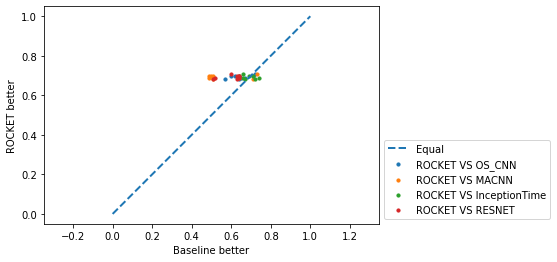

In [132]:
df = pd.DataFrame({'Classifier': ['Baseline wins',get_result_list[-1]+' wins','Same']})
df = df.T

fig = plt.figure()
plt.xlabel('Baseline better')
plt.ylabel(get_result_list[-1]+' better')
plt.plot([0, 1], [0, 1], '--', linewidth=2, markersize=0, label ='Equal',c ='C0')
plt.axis('equal')
for i in range(len(get_result_list)-1):
    temp = result_block[:,[i,-1]]
    temp = np.around(result_block[:,[i,-1]], decimals=2)
    print(f'temp[:,0] : {temp[:,0]}')
    print(f'temp[:,1] : {temp[:,1]}')
    print(get_result_list[i],wilcoxon(temp[:,0],temp[:,1]))   
    # if p-value <= 0.5 is difference x and y =>, reject null hypothesis (H0)  http://file.siam2web.com/natcha/531/2011926_67308.pdf

    max_index_temp = get_maxest_index(-temp)
    wins = np.count_nonzero(max_index_temp<2, axis = 0)
    count_same = ( wins[0] + wins[1] - 8 )   # 8 dataset cryptocurrency

    loss_win_tie = [wins[0] - count_same, wins[1] - count_same, count_same]    
    df.loc[get_result_list[i]] = blod_max(loss_win_tie)
    plt.scatter(temp[:,0],temp[:,1],label = get_result_list[-1]+' VS '+get_result_list[i], s =10)
    plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

print(df)
z = df.to_latex(header = None)
z = z.replace("blodstart ", "\\textbf{")
z = z.replace(" blodend ", "}")
z = z.replace("\\\\", " \\\\ \hline")
z = z.replace("\\toprule", "\hline")
z = z.replace("\\bottomrule", "")
z = z.replace("l"*(df.shape[1]+1), "|l"*(df.shape[1]+1)+"|")
print(z)

fig.savefig("/content/gdrive/MyDrive/Colab Notebooks/Compare result/result_compare_WF1.pdf", bbox_inches='tight')

In [ ]:
df = pd.DataFrame(['classifier_name','dataset_name','accuracy'])
df = df.T
dataset_name_list = file['dataset_name']
#print(dataset_name_list)
for j,classifier_name in enumerate(get_result_list):
    for i,dataset_name in enumerate(dataset_name_list):
        #print(classifier_name,i,result_block[i,j])
        #print(classifier_name,i,result_block[i,j])
        df = df.append([[classifier_name,i,result_block[i,j]]]) 

example_path = '/content/gdrive/MyDrive/Colab Notebooks/Compare result/example_WF1.csv'
df.to_csv(example_path,index=False,header =False )

In [ ]:
def draw_a_weasel_graph(result_block,dataset_list,dataset_class_name, main_classifer_name):
    dataset_type_list = dataset_class_name[0]
    dataset_type_name_list = dataset_class_name[1]
    z = [0]
    for i in dataset_type_list:
        z.append(len(i))

    
    orange_name = str(result_block.shape[1]-1)+" baseline classifiers"
    
    Last_results = result_block[:,-1]
    Other_result = result_block[:,0:-1]
    lowst_line = np.amin(Other_result,axis=1)
    highest_line = np.amax(Other_result,axis=1)
    
    larger_ind = Last_results>highest_line
    equal_ind = Last_results==highest_line 
    
    x_index_list = np.asarray(list(range(result_block.shape[0])))

    f = plt.figure(figsize=(15,3))
    ax = f.add_subplot(111)
    ax.fill_between(x_index_list, lowst_line, highest_line,facecolor='orange',label=orange_name)
    ax.plot(x_index_list, Last_results,'m-',label=main_classifer_name)
    ax.set_xticks(x_index_list) # make sure there is only 1 tick per value
    ax.set_xticklabels(dataset_list,rotation='vertical')
    ax.set_ylabel("Accuracy (%)")
    ax.set_title("Datasets ordered by Type")
    
    ax.scatter(x_index_list[larger_ind],Last_results[larger_ind], c = 'r',s =50, marker='o')
    ax.scatter(x_index_list[equal_ind],Last_results[equal_ind],c = 'g',s =50, marker = 'o')
    ax.grid(True)
    ax.legend(loc='lower right', bbox_to_anchor=(1, 1))
    #center lower
    iloc = 0
    for ind,i in enumerate(z[:-1]):
        iloc = iloc+i
        ax.plot([iloc-0.5,iloc-0.5], [0,100], 'b--', linewidth=3, markersize=0)
        ax.text(iloc, 30, dataset_type_name_list[ind],
         rotation=-90,
         horizontalalignment='left',
         verticalalignment='center',
         multialignment='center')

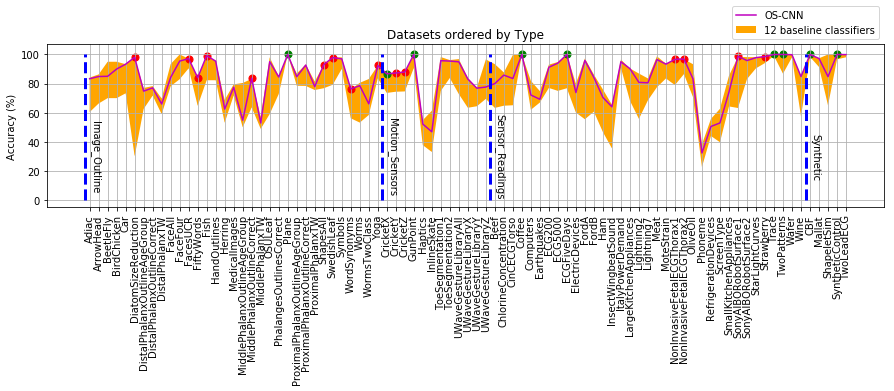

In [ ]:
result_path = './Full_result.csv'
file = pd.read_csv(result_path)
dataset_type_list= [Image_Outline, Motion_Sensors, Sensor_Readings,Synthetic]
dataset_type_name_list= ['Image_Outline', 'Motion_Sensors', 'Sensor_Readings','Synthetic']

df = pd.DataFrame({'Classifier': get_result_list})
df = df.T

big_result_block = []
name_list = []

for dataset_type_index,dataset_type in enumerate(dataset_type_list):

    data_name_list = dataset_type
    result_block = np.zeros([len(data_name_list),len(get_result_list)])
    for i,data_name in enumerate(data_name_list):
        dfb = file[file['dataset_name']==data_name].index.values.astype(int)    
        for j, Baseline_name in enumerate (get_result_list):
            temp = file.iloc[dfb][Baseline_name]
            temp = string2pair(temp.values[0])
            result_block[i,j] = temp[0]
            
    if len(big_result_block)==0:
        big_result_block = result_block
        name_list = dataset_type
    else:
        name_list = name_list+dataset_type
        big_result_block = np.concatenate((big_result_block,result_block),axis=0,)
    
    average_rank, wins= get_average_rank_and_wins(result_block)
    
    wins2= np.round(wins*100/len(data_name_list),2)

draw_a_weasel_graph(big_result_block,name_list,dataset_class_name=[dataset_type_list,dataset_type_name_list], main_classifer_name= 'OS-CNN')

In [ ]:
Image_Outline =['Adiac',
'ArrowHead',
'BeetleFly',
'BirdChicken',
'Car',
'DiatomSizeReduction',
'DistalPhalanxOutlineAgeGroup',
'DistalPhalanxOutlineCorrect',
'DistalPhalanxTW',
'FaceAll',
'FaceFour',
'FacesUCR',
'FiftyWords',
'Fish',
'HandOutlines',
'Herring',
'MedicalImages',
'MiddlePhalanxOutlineAgeGroup',
'MiddlePhalanxOutlineCorrect',
'MiddlePhalanxTW',
'OSULeaf',
'PhalangesOutlinesCorrect',
'Plane',
'ProximalPhalanxOutlineAgeGroup',
'ProximalPhalanxOutlineCorrect',
'ProximalPhalanxTW',
'ShapesAll',
'SwedishLeaf',
'Symbols',
'WordSynonyms',
'Worms',
'WormsTwoClass',
'Yoga'
 ]

Motion_Sensors = ['CricketX',
'CricketY',
'CricketZ',
'GunPoint',
'Haptics',
'InlineSkate',
'ToeSegmentation1',
'ToeSegmentation2',
'UWaveGestureLibraryAll',
'UWaveGestureLibraryX',
'UWaveGestureLibraryY',
'UWaveGestureLibraryZ']

Sensor_Readings=['Beef',
'ChlorineConcentration',
'CinCECGTorso',
'Coffee',
'Computers',
'Earthquakes',
'ECG200',
'ECG5000',
'ECGFiveDays',
'ElectricDevices',
'FordA',
'FordB',
'Ham',
'InsectWingbeatSound',
'ItalyPowerDemand',
'LargeKitchenAppliances',
'Lightning2',
'Lightning7',
'Meat',
'MoteStrain',
'NonInvasiveFetalECGThorax1',
'NonInvasiveFetalECGThorax2',
'OliveOil',
'Phoneme',
'RefrigerationDevices',
'ScreenType',
'SmallKitchenAppliances',
'SonyAIBORobotSurface1',
'SonyAIBORobotSurface2',
'StarLightCurves',
'Strawberry',
'Trace',
'TwoPatterns',
'Wafer',
'Wine']

Synthetic=['CBF',
         'Mallat',
          'ShapeletSim',
          'SyntheticControl',
          'TwoLeadECG'
          ]











In [ ]:
result_path = './Full_result.csv'

file = pd.read_csv(result_path)
dataset_type_list= [Image_Outline, Motion_Sensors, Sensor_Readings,Synthetic]
dataset_type_name_list= ['Image_Outline', 'Motion_Sensors', 'Sensor_Readings','Synthetic']



df = pd.DataFrame({'Classifier': get_result_list})
df = df.T


for dataset_type_index,dataset_type in enumerate(dataset_type_list):
    data_name_list = dataset_type
    result_block = np.zeros([len(data_name_list),len(get_result_list)])
    for i,data_name in enumerate(data_name_list):
        dfb = file[file['dataset_name']==data_name].index.values.astype(int)
        for j, keras_Baseline in enumerate (get_result_list):
            temp = file.iloc[dfb][keras_Baseline]
            temp = string2pair(temp.values[0])
            result_block[i,j] = temp[0]
    average_rank, wins= get_average_rank_and_wins(result_block)
    #temp = np.round(wins*100/np.sum(wins),2)
    #print(average_rank, wins)
    df.loc[dataset_type_name_list[dataset_type_index]+'('+str(len(dataset_type))+')'] = blod_min(average_rank)


z = df.to_latex(header = None)
z = z.replace("blodstart ", "\\textbf{")
z = z.replace(" blodend ", "}")
z = z.replace("\\\\", " \\\\ \hline")
z = z.replace("\\toprule", "\hline")
z = z.replace("\\bottomrule", "")
z = z.replace("l"*(df.shape[1]+1), "|l"*(df.shape[1]+1)+"|")
print(z)

\begin{tabular}{|l|l|l|l|l|l|l|l|l|l|l|l|l|l|}
\hline
Classifier          &       FCN &    ResNet &  1-NN DTW CV &   1-NN DTW &      BOSS &    WEASEL &  Flat-COTE &  HIVE-COTE &               InceptionTime &  Inception &    OS-CNN &  OS-CNN-ENS(5) &               OS-CNN-ENS(8)  \\ \hline
Image\_Outline(33)   &  7.939394 &  7.575758 &    11.227273 &  11.409091 &  7.681818 &  6.030303 &   7.075758 &   5.272727 &                    4.651515 &   6.606061 &  6.757576 &        4.69697 &  \textbf{4.075758} \\ \hline
Motion\_Sensors(12)  &  9.583333 &  9.333333 &    10.333333 &  11.666667 &  8.583333 &  7.916667 &   5.916667 &   3.916667 &                        4.25 &   5.583333 &      6.25 &       4.166667 &       \textbf{3.5} \\ \hline
Sensor\_Readings(35) &  7.614286 &  6.214286 &    10.628571 &  11.428571 &  8.614286 &  6.571429 &   5.771429 &   5.042857 &  \textbf{4.914286}&   6.142857 &  7.342857 &       5.657143 &                    5.057143  \\ \hline
Synthetic(5)        &       8.4 &

In [ ]:
Size_1_to_100 =[
'ItalyPowerDemand',
'SyntheticControl',
'SonyAIBORobotSurface2',
'SonyAIBORobotSurface1',
'DistalPhalanxOutlineAgeGroup',
'DistalPhalanxOutlineCorrect',
'DistalPhalanxTW',
'MiddlePhalanxOutlineAgeGroup',
'MiddlePhalanxOutlineCorrect',
'MiddlePhalanxTW',
'PhalangesOutlinesCorrect',
'ProximalPhalanxOutlineAgeGroup',
'ProximalPhalanxOutlineCorrect',
'ProximalPhalanxTW',
'TwoPatterns',
'MoteStrain',
'ECG200',
'ElectricDevices',
'MedicalImages',
]

Size_101_to_200=[
'CBF',
'SwedishLeaf',
'TwoLeadECG',
'FaceAll',
'FacesUCR',
'ECGFiveDays',
'ECG5000',
'Plane',
'GunPoint',
'Wafer',
'ChlorineConcentration',
'Adiac',

]

Size_201_to_300 =[
'Wine',
'Strawberry',
'ArrowHead',
'InsectWingbeatSound',
'FiftyWords',
'WordSynonyms',
'Trace',
'ToeSegmentation1',
'Coffee',
'CricketX',
'CricketY',
'CricketZ',
]

Size_301_to_400 =[
'UWaveGestureLibraryAll',
'UWaveGestureLibraryX',
'UWaveGestureLibraryY',
'Lightning7',
'ToeSegmentation2',
'DiatomSizeReduction',
'FaceFour',
]

Size_401_to_500 =[
'Symbols',
'Yoga',
'OSULeaf',
'Ham',
'Meat',
'Fish',
'Beef',
'FordA',
'FordB',
'ShapeletSim',
]
Size_501_to_600 =[
    'BeetleFly',
'BirdChicken',
'Car',
'Earthquakes',
'Herring',
'ShapesAll',
'OliveOil',
]
Size_601_to_ =[
'Lightning2',
'Computers',
'LargeKitchenAppliances',
'RefrigerationDevices',
'ScreenType',
'SmallKitchenAppliances',
'NonInvasiveFetalECGThorax1',
'NonInvasiveFetalECGThorax2',
'Worms',
'WormsTwoClass',
'UWaveGestureLibraryZ',
'Mallat',
'Phoneme',
'StarLightCurves',
'Haptics',
'CinCECGTorso',
'InlineSkate',
'HandOutlines',]


In [ ]:
file = pd.read_csv(result_path)
dataset_type_list= [
    Size_1_to_100, 
    Size_101_to_200, 
    Size_201_to_300,
    Size_301_to_400,
    Size_401_to_500,
    Size_501_to_600,
    Size_601_to_]

dataset_type_name_list= [
    'Size_1_to_100', 
    'Size_101_to_200', 
    'Size_201_to_300',
    'Size_301_to_400',
'Size_401_to_500',
'Size_501_to_600',
'Size_601_to_',
]



data_name_list = file['dataset_name']

df = pd.DataFrame({'Classifier': get_result_list})
df = df.T


for dataset_type_index,dataset_type in enumerate(dataset_type_list):

    data_name_list = dataset_type
    result_block = np.zeros([len(data_name_list),len(get_result_list)])
    for i,data_name in enumerate(data_name_list):
        dfb = file[file['dataset_name']==data_name].index.values.astype(int)
        for j, keras_Baseline in enumerate (get_result_list):
            temp = file.iloc[dfb][keras_Baseline]
            temp = string2pair(temp.values[0])
            result_block[i,j] = temp[0]
        
    average_rank, wins= get_average_rank_and_wins(result_block)
    print(average_rank, wins)
    #temp = np.round(wins*100/np.sum(wins),2)
    df.loc[dataset_type_name_list[dataset_type_index]+'('+str(len(dataset_type))+')'] = blod_min(average_rank)


z = df.to_latex(header = None)
z = z.replace("blodstart ", "\\textbf{")
z = z.replace(" blodend ", "}")
z = z.replace("\\\\", " \\\\ \hline")
z = z.replace("\\toprule", "\hline")
z = z.replace("\\bottomrule", "")
z = z.replace("l"*(df.shape[1]+1), "|l"*(df.shape[1]+1)+"|")
print(z)

[ 7.578947  6.631579 11.447368 11.526316  8.973684  6.184211  5.763158
  4.973684  4.552632  6.657895  7.131579  5.184211  4.394737] [1 0 0 1 1 0 4 1 6 0 0 0 2]
[ 6.666667  7.541667 10.625    10.666667  8.666667  7.        7.333333
  6.625     4.875     6.5       5.833333  4.416667  4.25    ] [1 0 0 0 0 2 0 0 2 0 0 0 2]
[ 9.041667  8.541667 10.416667 11.291667  9.708333  6.958333  6.708333
  4.958333  5.375     6.125     5.458333  3.458333  2.958333] [0 0 0 0 0 1 0 3 0 0 0 0 5]
[10.        8.285714 10.428571 11.142857  6.928571  8.071429  8.428571
  4.071429  4.214286  5.857143  6.        4.285714  3.285714] [0 0 0 0 1 1 0 2 1 0 0 0 1]
[ 9.6   6.9  11.55 12.25  6.5   7.1   7.05  3.95  4.9   6.4   6.4   4.5
  3.9 ] [0 3 0 0 0 1 0 1 2 0 0 0 2]
[ 7.        7.       10.428571 11.571429  6.        5.357143  6.285714
  5.142857  5.571429  6.285714  8.        6.642857  5.714286] [0 0 0 0 0 1 0 1 0 0 1 0 1]
[ 7.666667  6.277778 10.5      10.944444  8.694444  6.388889  5.055556
  4.888889  4.58

In [ ]:
def draw_a_weasel_graph(result_block,dataset_list,dataset_class_name, main_classifer_name):
    dataset_type_list = dataset_class_name[0]
    dataset_type_name_list = dataset_class_name[1]
    z = [0]
    for i in dataset_type_list:
        z.append(len(i))

    
    orange_name = str(result_block.shape[1]-1)+" baseline classifiers"
    
    Last_results = result_block[:,-1]
    Other_result = result_block[:,0:-1]
    lowst_line = np.amin(Other_result,axis=1)
    highest_line = np.amax(Other_result,axis=1)
    
    larger_ind = Last_results>highest_line
    equal_ind = Last_results==highest_line 
    
    x_index_list = np.asarray(list(range(result_block.shape[0])))

    f = plt.figure(figsize=(15,3))
    ax = f.add_subplot(111)
    ax.fill_between(x_index_list, lowst_line, highest_line,facecolor='orange',label=orange_name)
    ax.plot(x_index_list, Last_results,'m-',label=main_classifer_name)
    ax.set_xticks(x_index_list) # make sure there is only 1 tick per value
    ax.set_xticklabels(dataset_list,rotation='vertical')
    ax.set_ylabel("Accuracy (%)")
    ax.set_title("Datasets ordered by Type")
    
    ax.scatter(x_index_list[larger_ind],Last_results[larger_ind], c = 'r',s =50, marker='o')
    ax.scatter(x_index_list[equal_ind],Last_results[equal_ind],c = 'g',s =50, marker = 'o')
    ax.grid(True)
    ax.legend(loc='lower right', bbox_to_anchor=(1, 1))
    #center lower
    iloc = 0
    for ind,i in enumerate(z[:-1]):
        iloc = iloc+i
        ax.plot([iloc-0.5,iloc-0.5], [0,100], 'b--', linewidth=3, markersize=0)
        ax.text(iloc, 30, dataset_type_name_list[ind],
         rotation=-90,
         horizontalalignment='left',
         verticalalignment='center',
         multialignment='center')

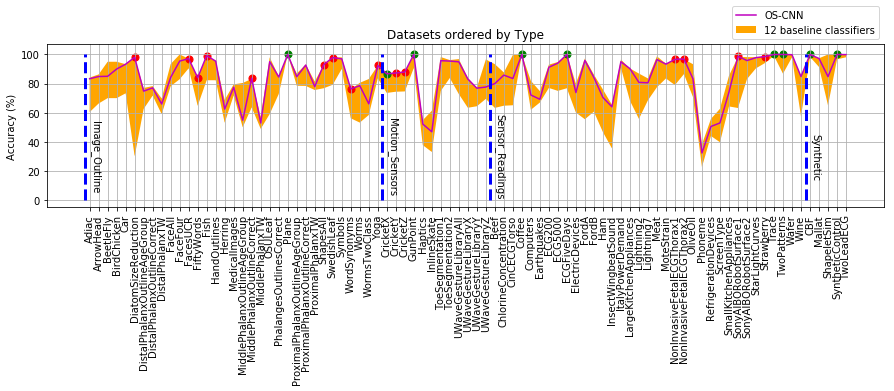

In [ ]:
result_path = './Full_result.csv'
file = pd.read_csv(result_path)
dataset_type_list= [Image_Outline, Motion_Sensors, Sensor_Readings,Synthetic]
dataset_type_name_list= ['Image_Outline', 'Motion_Sensors', 'Sensor_Readings','Synthetic']


df = pd.DataFrame({'Classifier': get_result_list})
df = df.T

big_result_block = []
name_list = []

for dataset_type_index,dataset_type in enumerate(dataset_type_list):

    data_name_list = dataset_type
    result_block = np.zeros([len(data_name_list),len(get_result_list)])
    for i,data_name in enumerate(data_name_list):
        dfb = file[file['dataset_name']==data_name].index.values.astype(int)    
        for j, Baseline_name in enumerate (get_result_list):
            temp = file.iloc[dfb][Baseline_name]
            temp = string2pair(temp.values[0])
            result_block[i,j] = temp[0]
            
    if len(big_result_block)==0:
        big_result_block = result_block
        name_list = dataset_type
    else:
        name_list = name_list+dataset_type
        big_result_block = np.concatenate((big_result_block,result_block),axis=0,)
    
    average_rank, wins= get_average_rank_and_wins(result_block)
    
    wins2= np.round(wins*100/len(data_name_list),2)

draw_a_weasel_graph(big_result_block,name_list,dataset_class_name=[dataset_type_list,dataset_type_name_list], main_classifer_name= 'OS-CNN')

#### **Walk Forward 2**

In [107]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from scipy.stats import rankdata

def string2pair(information):
    if type(information) == np.float64:
        mean = information
        std = 0
    else:
        information = information.strip()
        information = information.strip(')')
        result = information.split('(')
        mean = float(result[0])
        std = float(result[1])
    return (mean,std)


# deep learning classifier:
# USE MODEL
get_result_list = ['OS_CNN', 'MACNN', 'InceptionTime', 'RESNET','ROCKET']

print(get_result_list)

['OS_CNN', 'MACNN', 'InceptionTime', 'RESNET', 'ROCKET']


In [108]:
# result_path = './Full_result.csv'
result_path = '/content/gdrive/MyDrive/WF2.csv'

file = pd.read_csv(result_path)
result_block = np.zeros([file.shape[0],len(get_result_list)])
for i in range(file.shape[0]):
    data_name = file['dataset_name'][i]
    print(data_name)
    for j, keras_Baseline in enumerate (get_result_list):
        # print(j)
        # print(keras_Baseline)
        temp = string2pair(file[keras_Baseline][i])
        result_block[i,j] = temp[0]
print('average accuracy', np.mean(result_block,axis=0))

BTC
ETH
XRP
LTC
BNB
ADA
DOT
LINK
average accuracy [0.63991051 0.60885734 0.68540594 0.60876999 0.67342385]


In [109]:
def get_maxest_index(result_block):
    index = np.argsort(result_block,axis = 1)
    temp = np.zeros(result_block.shape)
    for i in range(result_block.shape[0]):
        l=result_block[i,:]
        temp[i,:] = rankdata(l,method='min')
        temp[i,:] = rankdata(l)
    return temp

def get_average_rank_and_wins(result_block):
    max_index_result = get_maxest_index(-result_block)
    average_rank =  np.around( np.average(max_index_result,axis=0), decimals=6)
    wins = np.count_nonzero(max_index_result==1, axis = 0)
    return average_rank, wins

average_rank, wins= get_average_rank_and_wins(result_block)

print('average rank',average_rank)
print('wins', wins)

# 0 : OS_CNN
# 1 : MACNN
# 2 : InceptionTime
# 3 : RESNET
# 4 : ROCKET

average rank [3.    3.75  1.75  4.125 2.375]
wins [2 1 5 0 0]


In [110]:
import pandas as pd
def blod_min(array):
    blod_val = min(array)
    output_result = []
    for i in array:
        if i == blod_val:
            element_str = 'blodstart '+str(i)+' blodend'
        else:
            element_str = str(i)
        output_result.append(element_str)    
    return output_result

def blod_max(array):
    blod_val = max(array)
    output_result = []
    for i in array:
        if i == blod_val:
            element_str = 'blodstart '+str(i)+' blodend'
        else:
            element_str = str(i)
        output_result.append(element_str)    
    return output_result


df = pd.DataFrame({'Classifier': get_result_list})
df = df.T

df.loc['Average rank'] = average_rank
df.loc['Counts of wins'] = wins
print(df.index[df.index=='Average rank'])
print(df,end='\n\n')

df = pd.DataFrame({'Classifier': get_result_list})
df = df.T

average_accuracy_dp = np.round(np.mean(result_block,axis=0),2)

df.loc['Average rank'] = blod_min(average_rank)
df.loc['Counts of wins'] = blod_max(wins)
df.loc['Average accuracy(\%)'] = blod_max(average_accuracy_dp)

z = df.to_latex(header = None)
z = z.replace("blodstart ", "\\textbf{")
z = z.replace(" blodend ", "}")
z = z.replace("\\\\", " \\\\ \hline")
z = z.replace("\\toprule", "\hline")
z = z.replace("\\bottomrule", "")
z = z.replace("l"*(df.shape[1]+1), "|l"*(df.shape[1]+1)+"|")

print(z)

Index(['Average rank'], dtype='object')
                     0      1              2       3       4
Classifier      OS_CNN  MACNN  InceptionTime  RESNET  ROCKET
Average rank       3.0   3.75           1.75   4.125   2.375
Counts of wins       2      1              5       0       0

\begin{tabular}{|l|l|l|l|l|l|}
\hline
Classifier           &  OS\_CNN &  MACNN &           InceptionTime &  RESNET &  ROCKET  \\ \hline
Average rank         &     3.0 &   3.75 &  \textbf{1.75}&   4.125 &   2.375  \\ \hline
Counts of wins       &       2 &      1 &     \textbf{5}&       0 &       0  \\ \hline
Average accuracy(\textbackslash \%) &    0.64 &   0.61 &  \textbf{0.69}&    0.61 &    0.67  \\ \hline

\end{tabular}



temp[:,0] : [0.6  0.54 0.64 0.66 0.53 0.68 0.72 0.74]
temp[:,1] : [0.63 0.69 0.68 0.69 0.65 0.63 0.72 0.7 ]
OS_CNN WilcoxonResult(statistic=8.5, pvalue=0.3516806827985527)
temp[:,0] : [0.56 0.56 0.67 0.73 0.52 0.51 0.67 0.65]
temp[:,1] : [0.63 0.69 0.68 0.69 0.65 0.63 0.72 0.7 ]
MACNN WilcoxonResult(statistic=2.0, pvalue=0.02488399513396536)
temp[:,0] : [0.65 0.72 0.69 0.71 0.72 0.6  0.74 0.66]
temp[:,1] : [0.63 0.69 0.68 0.69 0.65 0.63 0.72 0.7 ]
InceptionTime WilcoxonResult(statistic=12.5, pvalue=0.4383887362031065)
temp[:,0] : [0.48 0.71 0.56 0.63 0.57 0.62 0.64 0.65]
temp[:,1] : [0.63 0.69 0.68 0.69 0.65 0.63 0.72 0.7 ]
RESNET WilcoxonResult(statistic=2.0, pvalue=0.02506184434388362)
                                 0                    1     2
Classifier           Baseline wins          ROCKET wins  Same
OS_CNN                           2  blodstart 5 blodend     1
MACNN                            1  blodstart 7 blodend     0
InceptionTime  blodstart 6 blodend                    2

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


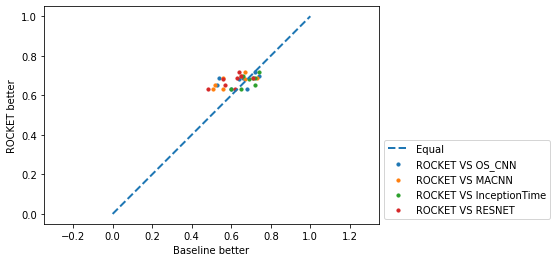

In [112]:
df = pd.DataFrame({'Classifier': ['Baseline wins',get_result_list[-1]+' wins','Same']})
df = df.T

fig = plt.figure()
plt.xlabel('Baseline better')
plt.ylabel(get_result_list[-1]+' better')
plt.plot([0, 1], [0, 1], '--', linewidth=2, markersize=0, label ='Equal',c ='C0')
plt.axis('equal')
for i in range(len(get_result_list)-1):
    temp = result_block[:,[i,-1]]
    temp = np.around(result_block[:,[i,-1]], decimals=2)
    print(f'temp[:,0] : {temp[:,0]}')
    print(f'temp[:,1] : {temp[:,1]}')
    print(get_result_list[i],wilcoxon(temp[:,0],temp[:,1]))   
    # if p-value <= 0.5 is difference x and y =>, reject null hypothesis (H0)  http://file.siam2web.com/natcha/531/2011926_67308.pdf

    max_index_temp = get_maxest_index(-temp)
    wins = np.count_nonzero(max_index_temp<2, axis = 0)
    count_same = ( wins[0] + wins[1] - 8 )   # 8 dataset cryptocurrency

    loss_win_tie = [wins[0] - count_same, wins[1] - count_same, count_same]    
    df.loc[get_result_list[i]] = blod_max(loss_win_tie)
    plt.scatter(temp[:,0],temp[:,1],label = get_result_list[-1]+' VS '+get_result_list[i], s =10)
    plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

print(df)
z = df.to_latex(header = None)
z = z.replace("blodstart ", "\\textbf{")
z = z.replace(" blodend ", "}")
z = z.replace("\\\\", " \\\\ \hline")
z = z.replace("\\toprule", "\hline")
z = z.replace("\\bottomrule", "")
z = z.replace("l"*(df.shape[1]+1), "|l"*(df.shape[1]+1)+"|")
print(z)

fig.savefig("/content/gdrive/MyDrive/Colab Notebooks/Compare result/result_compare_WF2.pdf", bbox_inches='tight')

In [113]:
df = pd.DataFrame(['classifier_name','dataset_name','accuracy'])
df = df.T
dataset_name_list = file['dataset_name']
#print(dataset_name_list)
for j,classifier_name in enumerate(get_result_list):
    for i,dataset_name in enumerate(dataset_name_list):
        #print(classifier_name,i,result_block[i,j])
        #print(classifier_name,i,result_block[i,j])
        df = df.append([[classifier_name,i,result_block[i,j]]]) 

example_path = '/content/gdrive/MyDrive/Colab Notebooks/Compare result/example_WF2.csv'
df.to_csv(example_path,index=False,header =False )

In [ ]:
def draw_a_weasel_graph(result_block,dataset_list,dataset_class_name, main_classifer_name):
    dataset_type_list = dataset_class_name[0]
    dataset_type_name_list = dataset_class_name[1]
    z = [0]
    for i in dataset_type_list:
        z.append(len(i))

    
    orange_name = str(result_block.shape[1]-1)+" baseline classifiers"
    
    Last_results = result_block[:,-1]
    Other_result = result_block[:,0:-1]
    lowst_line = np.amin(Other_result,axis=1)
    highest_line = np.amax(Other_result,axis=1)
    
    larger_ind = Last_results>highest_line
    equal_ind = Last_results==highest_line 
    
    x_index_list = np.asarray(list(range(result_block.shape[0])))

    f = plt.figure(figsize=(15,3))
    ax = f.add_subplot(111)
    ax.fill_between(x_index_list, lowst_line, highest_line,facecolor='orange',label=orange_name)
    ax.plot(x_index_list, Last_results,'m-',label=main_classifer_name)
    ax.set_xticks(x_index_list) # make sure there is only 1 tick per value
    ax.set_xticklabels(dataset_list,rotation='vertical')
    ax.set_ylabel("Accuracy (%)")
    ax.set_title("Datasets ordered by Type")
    
    ax.scatter(x_index_list[larger_ind],Last_results[larger_ind], c = 'r',s =50, marker='o')
    ax.scatter(x_index_list[equal_ind],Last_results[equal_ind],c = 'g',s =50, marker = 'o')
    ax.grid(True)
    ax.legend(loc='lower right', bbox_to_anchor=(1, 1))
    #center lower
    iloc = 0
    for ind,i in enumerate(z[:-1]):
        iloc = iloc+i
        ax.plot([iloc-0.5,iloc-0.5], [0,100], 'b--', linewidth=3, markersize=0)
        ax.text(iloc, 30, dataset_type_name_list[ind],
         rotation=-90,
         horizontalalignment='left',
         verticalalignment='center',
         multialignment='center')

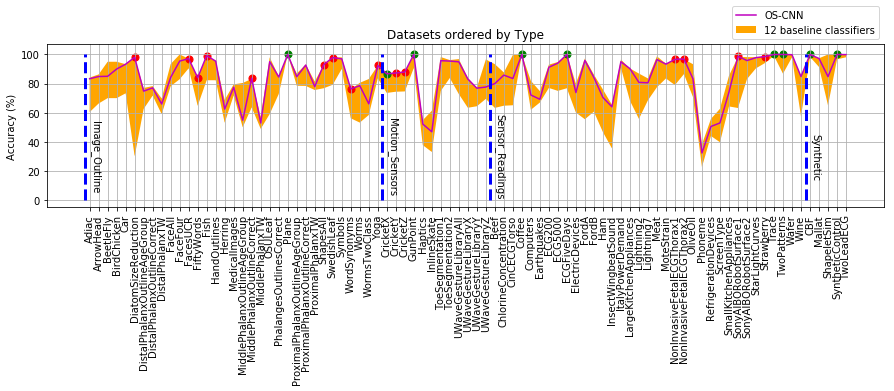

In [ ]:
result_path = './Full_result.csv'
file = pd.read_csv(result_path)
dataset_type_list= [Image_Outline, Motion_Sensors, Sensor_Readings,Synthetic]
dataset_type_name_list= ['Image_Outline', 'Motion_Sensors', 'Sensor_Readings','Synthetic']

df = pd.DataFrame({'Classifier': get_result_list})
df = df.T

big_result_block = []
name_list = []

for dataset_type_index,dataset_type in enumerate(dataset_type_list):

    data_name_list = dataset_type
    result_block = np.zeros([len(data_name_list),len(get_result_list)])
    for i,data_name in enumerate(data_name_list):
        dfb = file[file['dataset_name']==data_name].index.values.astype(int)    
        for j, Baseline_name in enumerate (get_result_list):
            temp = file.iloc[dfb][Baseline_name]
            temp = string2pair(temp.values[0])
            result_block[i,j] = temp[0]
            
    if len(big_result_block)==0:
        big_result_block = result_block
        name_list = dataset_type
    else:
        name_list = name_list+dataset_type
        big_result_block = np.concatenate((big_result_block,result_block),axis=0,)
    
    average_rank, wins= get_average_rank_and_wins(result_block)
    
    wins2= np.round(wins*100/len(data_name_list),2)

draw_a_weasel_graph(big_result_block,name_list,dataset_class_name=[dataset_type_list,dataset_type_name_list], main_classifer_name= 'OS-CNN')

In [ ]:
Image_Outline =['Adiac',
'ArrowHead',
'BeetleFly',
'BirdChicken',
'Car',
'DiatomSizeReduction',
'DistalPhalanxOutlineAgeGroup',
'DistalPhalanxOutlineCorrect',
'DistalPhalanxTW',
'FaceAll',
'FaceFour',
'FacesUCR',
'FiftyWords',
'Fish',
'HandOutlines',
'Herring',
'MedicalImages',
'MiddlePhalanxOutlineAgeGroup',
'MiddlePhalanxOutlineCorrect',
'MiddlePhalanxTW',
'OSULeaf',
'PhalangesOutlinesCorrect',
'Plane',
'ProximalPhalanxOutlineAgeGroup',
'ProximalPhalanxOutlineCorrect',
'ProximalPhalanxTW',
'ShapesAll',
'SwedishLeaf',
'Symbols',
'WordSynonyms',
'Worms',
'WormsTwoClass',
'Yoga'
 ]

Motion_Sensors = ['CricketX',
'CricketY',
'CricketZ',
'GunPoint',
'Haptics',
'InlineSkate',
'ToeSegmentation1',
'ToeSegmentation2',
'UWaveGestureLibraryAll',
'UWaveGestureLibraryX',
'UWaveGestureLibraryY',
'UWaveGestureLibraryZ']

Sensor_Readings=['Beef',
'ChlorineConcentration',
'CinCECGTorso',
'Coffee',
'Computers',
'Earthquakes',
'ECG200',
'ECG5000',
'ECGFiveDays',
'ElectricDevices',
'FordA',
'FordB',
'Ham',
'InsectWingbeatSound',
'ItalyPowerDemand',
'LargeKitchenAppliances',
'Lightning2',
'Lightning7',
'Meat',
'MoteStrain',
'NonInvasiveFetalECGThorax1',
'NonInvasiveFetalECGThorax2',
'OliveOil',
'Phoneme',
'RefrigerationDevices',
'ScreenType',
'SmallKitchenAppliances',
'SonyAIBORobotSurface1',
'SonyAIBORobotSurface2',
'StarLightCurves',
'Strawberry',
'Trace',
'TwoPatterns',
'Wafer',
'Wine']

Synthetic=['CBF',
         'Mallat',
          'ShapeletSim',
          'SyntheticControl',
          'TwoLeadECG'
          ]











In [ ]:
result_path = './Full_result.csv'

file = pd.read_csv(result_path)
dataset_type_list= [Image_Outline, Motion_Sensors, Sensor_Readings,Synthetic]
dataset_type_name_list= ['Image_Outline', 'Motion_Sensors', 'Sensor_Readings','Synthetic']



df = pd.DataFrame({'Classifier': get_result_list})
df = df.T


for dataset_type_index,dataset_type in enumerate(dataset_type_list):
    data_name_list = dataset_type
    result_block = np.zeros([len(data_name_list),len(get_result_list)])
    for i,data_name in enumerate(data_name_list):
        dfb = file[file['dataset_name']==data_name].index.values.astype(int)
        for j, keras_Baseline in enumerate (get_result_list):
            temp = file.iloc[dfb][keras_Baseline]
            temp = string2pair(temp.values[0])
            result_block[i,j] = temp[0]
    average_rank, wins= get_average_rank_and_wins(result_block)
    #temp = np.round(wins*100/np.sum(wins),2)
    #print(average_rank, wins)
    df.loc[dataset_type_name_list[dataset_type_index]+'('+str(len(dataset_type))+')'] = blod_min(average_rank)


z = df.to_latex(header = None)
z = z.replace("blodstart ", "\\textbf{")
z = z.replace(" blodend ", "}")
z = z.replace("\\\\", " \\\\ \hline")
z = z.replace("\\toprule", "\hline")
z = z.replace("\\bottomrule", "")
z = z.replace("l"*(df.shape[1]+1), "|l"*(df.shape[1]+1)+"|")
print(z)

\begin{tabular}{|l|l|l|l|l|l|l|l|l|l|l|l|l|l|}
\hline
Classifier          &       FCN &    ResNet &  1-NN DTW CV &   1-NN DTW &      BOSS &    WEASEL &  Flat-COTE &  HIVE-COTE &               InceptionTime &  Inception &    OS-CNN &  OS-CNN-ENS(5) &               OS-CNN-ENS(8)  \\ \hline
Image\_Outline(33)   &  7.939394 &  7.575758 &    11.227273 &  11.409091 &  7.681818 &  6.030303 &   7.075758 &   5.272727 &                    4.651515 &   6.606061 &  6.757576 &        4.69697 &  \textbf{4.075758} \\ \hline
Motion\_Sensors(12)  &  9.583333 &  9.333333 &    10.333333 &  11.666667 &  8.583333 &  7.916667 &   5.916667 &   3.916667 &                        4.25 &   5.583333 &      6.25 &       4.166667 &       \textbf{3.5} \\ \hline
Sensor\_Readings(35) &  7.614286 &  6.214286 &    10.628571 &  11.428571 &  8.614286 &  6.571429 &   5.771429 &   5.042857 &  \textbf{4.914286}&   6.142857 &  7.342857 &       5.657143 &                    5.057143  \\ \hline
Synthetic(5)        &       8.4 &

In [ ]:
Size_1_to_100 =[
'ItalyPowerDemand',
'SyntheticControl',
'SonyAIBORobotSurface2',
'SonyAIBORobotSurface1',
'DistalPhalanxOutlineAgeGroup',
'DistalPhalanxOutlineCorrect',
'DistalPhalanxTW',
'MiddlePhalanxOutlineAgeGroup',
'MiddlePhalanxOutlineCorrect',
'MiddlePhalanxTW',
'PhalangesOutlinesCorrect',
'ProximalPhalanxOutlineAgeGroup',
'ProximalPhalanxOutlineCorrect',
'ProximalPhalanxTW',
'TwoPatterns',
'MoteStrain',
'ECG200',
'ElectricDevices',
'MedicalImages',
]

Size_101_to_200=[
'CBF',
'SwedishLeaf',
'TwoLeadECG',
'FaceAll',
'FacesUCR',
'ECGFiveDays',
'ECG5000',
'Plane',
'GunPoint',
'Wafer',
'ChlorineConcentration',
'Adiac',

]

Size_201_to_300 =[
'Wine',
'Strawberry',
'ArrowHead',
'InsectWingbeatSound',
'FiftyWords',
'WordSynonyms',
'Trace',
'ToeSegmentation1',
'Coffee',
'CricketX',
'CricketY',
'CricketZ',
]

Size_301_to_400 =[
'UWaveGestureLibraryAll',
'UWaveGestureLibraryX',
'UWaveGestureLibraryY',
'Lightning7',
'ToeSegmentation2',
'DiatomSizeReduction',
'FaceFour',
]

Size_401_to_500 =[
'Symbols',
'Yoga',
'OSULeaf',
'Ham',
'Meat',
'Fish',
'Beef',
'FordA',
'FordB',
'ShapeletSim',
]
Size_501_to_600 =[
    'BeetleFly',
'BirdChicken',
'Car',
'Earthquakes',
'Herring',
'ShapesAll',
'OliveOil',
]
Size_601_to_ =[
'Lightning2',
'Computers',
'LargeKitchenAppliances',
'RefrigerationDevices',
'ScreenType',
'SmallKitchenAppliances',
'NonInvasiveFetalECGThorax1',
'NonInvasiveFetalECGThorax2',
'Worms',
'WormsTwoClass',
'UWaveGestureLibraryZ',
'Mallat',
'Phoneme',
'StarLightCurves',
'Haptics',
'CinCECGTorso',
'InlineSkate',
'HandOutlines',]


In [ ]:
file = pd.read_csv(result_path)
dataset_type_list= [
    Size_1_to_100, 
    Size_101_to_200, 
    Size_201_to_300,
    Size_301_to_400,
    Size_401_to_500,
    Size_501_to_600,
    Size_601_to_]

dataset_type_name_list= [
    'Size_1_to_100', 
    'Size_101_to_200', 
    'Size_201_to_300',
    'Size_301_to_400',
'Size_401_to_500',
'Size_501_to_600',
'Size_601_to_',
]



data_name_list = file['dataset_name']

df = pd.DataFrame({'Classifier': get_result_list})
df = df.T


for dataset_type_index,dataset_type in enumerate(dataset_type_list):

    data_name_list = dataset_type
    result_block = np.zeros([len(data_name_list),len(get_result_list)])
    for i,data_name in enumerate(data_name_list):
        dfb = file[file['dataset_name']==data_name].index.values.astype(int)
        for j, keras_Baseline in enumerate (get_result_list):
            temp = file.iloc[dfb][keras_Baseline]
            temp = string2pair(temp.values[0])
            result_block[i,j] = temp[0]
        
    average_rank, wins= get_average_rank_and_wins(result_block)
    print(average_rank, wins)
    #temp = np.round(wins*100/np.sum(wins),2)
    df.loc[dataset_type_name_list[dataset_type_index]+'('+str(len(dataset_type))+')'] = blod_min(average_rank)


z = df.to_latex(header = None)
z = z.replace("blodstart ", "\\textbf{")
z = z.replace(" blodend ", "}")
z = z.replace("\\\\", " \\\\ \hline")
z = z.replace("\\toprule", "\hline")
z = z.replace("\\bottomrule", "")
z = z.replace("l"*(df.shape[1]+1), "|l"*(df.shape[1]+1)+"|")
print(z)

[ 7.578947  6.631579 11.447368 11.526316  8.973684  6.184211  5.763158
  4.973684  4.552632  6.657895  7.131579  5.184211  4.394737] [1 0 0 1 1 0 4 1 6 0 0 0 2]
[ 6.666667  7.541667 10.625    10.666667  8.666667  7.        7.333333
  6.625     4.875     6.5       5.833333  4.416667  4.25    ] [1 0 0 0 0 2 0 0 2 0 0 0 2]
[ 9.041667  8.541667 10.416667 11.291667  9.708333  6.958333  6.708333
  4.958333  5.375     6.125     5.458333  3.458333  2.958333] [0 0 0 0 0 1 0 3 0 0 0 0 5]
[10.        8.285714 10.428571 11.142857  6.928571  8.071429  8.428571
  4.071429  4.214286  5.857143  6.        4.285714  3.285714] [0 0 0 0 1 1 0 2 1 0 0 0 1]
[ 9.6   6.9  11.55 12.25  6.5   7.1   7.05  3.95  4.9   6.4   6.4   4.5
  3.9 ] [0 3 0 0 0 1 0 1 2 0 0 0 2]
[ 7.        7.       10.428571 11.571429  6.        5.357143  6.285714
  5.142857  5.571429  6.285714  8.        6.642857  5.714286] [0 0 0 0 0 1 0 1 0 0 1 0 1]
[ 7.666667  6.277778 10.5      10.944444  8.694444  6.388889  5.055556
  4.888889  4.58

In [ ]:
def draw_a_weasel_graph(result_block,dataset_list,dataset_class_name, main_classifer_name):
    dataset_type_list = dataset_class_name[0]
    dataset_type_name_list = dataset_class_name[1]
    z = [0]
    for i in dataset_type_list:
        z.append(len(i))

    
    orange_name = str(result_block.shape[1]-1)+" baseline classifiers"
    
    Last_results = result_block[:,-1]
    Other_result = result_block[:,0:-1]
    lowst_line = np.amin(Other_result,axis=1)
    highest_line = np.amax(Other_result,axis=1)
    
    larger_ind = Last_results>highest_line
    equal_ind = Last_results==highest_line 
    
    x_index_list = np.asarray(list(range(result_block.shape[0])))

    f = plt.figure(figsize=(15,3))
    ax = f.add_subplot(111)
    ax.fill_between(x_index_list, lowst_line, highest_line,facecolor='orange',label=orange_name)
    ax.plot(x_index_list, Last_results,'m-',label=main_classifer_name)
    ax.set_xticks(x_index_list) # make sure there is only 1 tick per value
    ax.set_xticklabels(dataset_list,rotation='vertical')
    ax.set_ylabel("Accuracy (%)")
    ax.set_title("Datasets ordered by Type")
    
    ax.scatter(x_index_list[larger_ind],Last_results[larger_ind], c = 'r',s =50, marker='o')
    ax.scatter(x_index_list[equal_ind],Last_results[equal_ind],c = 'g',s =50, marker = 'o')
    ax.grid(True)
    ax.legend(loc='lower right', bbox_to_anchor=(1, 1))
    #center lower
    iloc = 0
    for ind,i in enumerate(z[:-1]):
        iloc = iloc+i
        ax.plot([iloc-0.5,iloc-0.5], [0,100], 'b--', linewidth=3, markersize=0)
        ax.text(iloc, 30, dataset_type_name_list[ind],
         rotation=-90,
         horizontalalignment='left',
         verticalalignment='center',
         multialignment='center')

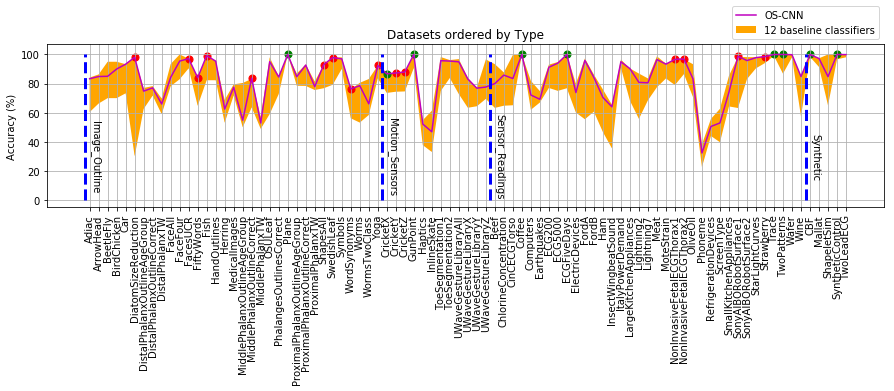

In [ ]:
result_path = './Full_result.csv'
file = pd.read_csv(result_path)
dataset_type_list= [Image_Outline, Motion_Sensors, Sensor_Readings,Synthetic]
dataset_type_name_list= ['Image_Outline', 'Motion_Sensors', 'Sensor_Readings','Synthetic']


df = pd.DataFrame({'Classifier': get_result_list})
df = df.T

big_result_block = []
name_list = []

for dataset_type_index,dataset_type in enumerate(dataset_type_list):

    data_name_list = dataset_type
    result_block = np.zeros([len(data_name_list),len(get_result_list)])
    for i,data_name in enumerate(data_name_list):
        dfb = file[file['dataset_name']==data_name].index.values.astype(int)    
        for j, Baseline_name in enumerate (get_result_list):
            temp = file.iloc[dfb][Baseline_name]
            temp = string2pair(temp.values[0])
            result_block[i,j] = temp[0]
            
    if len(big_result_block)==0:
        big_result_block = result_block
        name_list = dataset_type
    else:
        name_list = name_list+dataset_type
        big_result_block = np.concatenate((big_result_block,result_block),axis=0,)
    
    average_rank, wins= get_average_rank_and_wins(result_block)
    
    wins2= np.round(wins*100/len(data_name_list),2)

draw_a_weasel_graph(big_result_block,name_list,dataset_class_name=[dataset_type_list,dataset_type_name_list], main_classifer_name= 'OS-CNN')